In [1]:
import numpy

In [2]:
import matplotlib

In [3]:
# matplotlib.rcParams['pdf.fonttype'] = 1
# matplotlib.rcParams['ps.fonttype'] = 1
from matplotlib import pyplot as plt
# matplotlib.rcParams['pdf.use14corefonts'] = True
# matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['text.usetex'] = False

# ASR

In [210]:
def plot_prod(data, index, label, linewidth=1, color="r", kw=""):
    x = ["10s", "15s", "20s", "25s", "30s", "35s", "40s", "45s"] #numpy.arange(8)
    y = list(map(float, data.split("\n")[index].split()))
    if index == 3:
        y2 = map(float, data.split("\n")[index + 1].split())
        y = (numpy.array(list(y)) + numpy.array(list(y2))) / 2
    plt.plot(x, y, kw, linewidth=linewidth, marker="o", label=label, color=color)
    
def plot_eval(data, name, label, linewidth=1, color="r", kw="", ax=None):
    x = ['dev\n< 10s',
         'dev\n10-15s',
         'dev\n15-20s',
         'dev',
         'test\n< 10s',
         'test\n10-15s',
         'test',
         'dev\n< 10s',
         'dev\n10-15s',
         'dev\n15-20s',
         'dev\n> 20s',
         'dev',
         'test\n< 10s',
         'test\n10-15s',
         'test\n15-20s',
         'test\n> 20s',
         'test',
         'dev-clean\n< 10s',
         'dev-clean\n10-15s',
         'dev-clean\n15-20s',
         'dev-clean\n> 20s',
         'dev-clean',
         'dev-other\n< 10s',
         'dev-other\n10-15s',
         'dev-other\n15-20s',
         'dev-other\n> 20s',
         'dev-other',
         'test-clean\n< 10s',
         'test-clean\n10-15s',
         'test-clean\n15-20s',
         'test-clean\n> 20s',
         'test-clean',
         'test-other\n< 10s',
         'test-other\n10-15s',
         'test-other\n15-20s',
         'test-other\n> 20s',
         'test-other']
    x_new = ['< 10s',
         '10-15s',
         '15-20s',
         'total',
         '< 10s',
         '10-15s',
         'total',
         '< 10s',
         '10-15s',
         '15-20s',
         '> 20s',
         'total',
         '< 10s',
         '10-15s',
         '15-20s',
         '> 20s',
         'total',
         '< 10s',
         '10-15s',
         '15-20s',
         '> 20s',
         'total',
         '< 10s',
         '10-15s',
         '15-20s',
         '> 20s',
         'total',
         '< 10s',
         '10-15s',
         '15-20s',
         '> 20s',
         'total',
         '< 10s',
         '10-15s',
         '15-20s',
         '> 20s',
         'total']
    y = list(map(float, data.split("\t")))
    if name == "wsj":
        x = x_new[4:7]
        y = y[4:7]
#     elif name == "tl":
#         x = x_new[12:17]
#         y = y[12:17]
    elif name == "tl":
        x = x_new[7:12]
        y = y[7:12]
    elif name == "ls-clean":
        x = x_new[27:32]
        y = y[27:32]
    elif name == "ls-other":
        x = x_new[32:]
        y = y[32:]
    if ax is None:
        plt.plot(x, y, kw, linewidth=linewidth, marker="o", label=label, color=color)
    else:
        ax.plot(x, y, kw, linewidth=linewidth, marker="o", label=label, color=color)

## WSJ

In [5]:
wsj_sinpos = "13.9	12.6	11.8	13.45	11.8	11.4	11.7	41.2	39.9	48.5	78.7	48.8	42.4	39.1	45	71.9	42.1	29.9	29.8	32.9	60.5	32.4	53.3	51.5	51.8	73.4	53.8	31.6	28.7	29.9	50.4	32.7	53.3	50.6	55.6	70.1	54"
wsj_sinpos_prod = """79.7 78.9 81.1 86.7 90.9 93.5 94.1 94.8
65.7 66.3 70.0 79.2 86.2 89.9 91.3 92.7 
72.6 73.1 76.3 83.0 88.0 90.3 91.3 92.1 
81.2 80.0 81.6 86.3 90.4 93.0 94.5 95.6 
81.6 80.4 82.0 86.6 90.4 92.8 94.2 95.0"""

wsj_relpos ="13	11.45	10.7	12.6	11.5	10.6	11.3	40.9	38.5	46.7	68.7	46	40.6	37.3	45.3	68.55	40.4	29.1	28.3	33.1	57.9	31.5	52.6	51.2	53.2	71.1	53.3	30.8	27.5	30.2	48.3	31.8	52.5	50.2	56.6	76.3	53.8"
wsj_relpos_prod = """82.5 80.5 82.0 86.9 92.3 95.4 96.4 96.8 
65.5 65.7 69.6 78.1 86.8 92.2 94.3 95.6 
72.5 72.3 76.0 82.7 89.2 92.4 93.5 94.2 
83.1 80.7 82.3 87.1 92.4 95.6 97.2 97.9 
83.2 81.0 82.4 87.1 91.9 95.0 96.5 97.1"""

wsj_relpos_one = "12.6	11.5	6.95	12.1	11	10	10.7	38.1	34.6	37.9	40.6	37.2	38.1	33.3	34.3	33.6	35.6	27.8	26.8	26.5	28.6	27.5	50	48.2	46.4	45.3	49.1	29.1	26	25.2	26.5	27.6	50.6	46.7	50.6	49.3	49.7"
wsj_relpos_one_prod = """77.0 75.8 75.8 76.4 76.6 78.4 77.7 78.6 
62.6 62.0 62.6 63.2 63.9 65.3 65.4 66.1 
69.3 68.9 69.5 70.1 70.7 71.8 72.0 72.6 
77.7 76.5 76.4 76.6 77.2 77.9 78.4 79.2 
78.3 77.0 77.0 77.3 77.9 78.5 78.7 79.3"""

wsj_relpos_200 = "13.2	12.4	9.1	12.8	10.9	10.5	10.8	40.5	38.8	45.1	55.8	43.5	41.6	37.9	39.7	47.5	40.1	0	0	0	0	0	0	0	0	0	0	31.1	28.3	29	34.7	30.6	52.2	49.7	53.6	59.8	52.3"
wsj_relpos_200_prod="""80.8 79.4 80.6 83.1 85.7 88.6 89.9 91.6 
65.0 65.6 68.2 71.8 75.8 80.2 83.2 86.2 
72.1 72.4 74.8 77.8 81.2 84.1 86.1 88.1 
81.6 80.0 81.1 83.2 85.8 88.3 90.5 92.4 
81.7 80.3 81.3 83.3 85.7 88.1 89.9 91.7"""

wsj_nopos = "53.6	50.4	45.5	52.5	47.3	46.4	47.1	76.4	74.6	74.8	75.5	75.3	79.4	75.3	75.4	73.3	77.3	69.9	65.4	65.1	63	67.8	83.3	79.6	77.7	76.5	81.8	70.5	64.1	63	62.2	67.2	83.4	79.6	78.9	76.3	81.7"
wsj_nopos_prod = """92.7 92.2 92.0 92.1 92.0 92.4 92.1 92.4 
88.0 87.4 87.4 87.4 87.4 87.9 87.8 87.9 
90.5 89.9 89.9 89.9 90.0 90.2 90.2 90.3 
93.3 92.5 92.3 92.3 92.3 92.4 92.5 92.5 
93.3 92.6 92.4 92.4 92.5 92.6 92.6 92.7"""

wsj_abspos = "13.9	11.9	11.8	13.2	11.8	11.3	11.7	41	40.2	47.3	55.4	44.5	42	39.5	41.3	44.1	40.9	29.2	29.7	32.6	35.8	30.2	52.3	51.6	52.3	54.9	52.3	30.8	28.4	29.5	31.7	30.2	52.1	49.6	55.5	58.8	52.3"
wsj_abspos_prod = """79.7 80.2 81.3 82.4 85.1 88.2 89.1 91.5 
65.8 67.4 70.1 71.8 76.3 80.3 82.2 86.1 
72.4 74.0 76.5 77.6 81.3 83.7 84.9 87.7 
80.9 80.7 81.5 82.3 85.2 87.1 88.5 91.2 
81.1 80.9 81.9 82.9 85.5 87.5 88.8 91.2"""

wsj_cape_no_scale = "13	12.2	10.2	12.7	10.7	10.5	10.7	40.6	38	41.7	41.7	40.1	40.9	36.7	37.6	34	38.7	29.2	28.8	28.9	29	29	51.9	49.6	49.2	46.6	51	30.3	27.6	26.9	26.5	28.9	51.9	49.1	53	49.7	51.3"
wsj_cape_no_scale_prod = """78.0 77.8 77.6 77.2 77.4 79.0 78.9 80.0 
64.8 65.3 66.0 65.9 66.1 67.7 68.1 69.5 
71.4 71.7 72.5 72.0 72.2 73.3 73.5 74.5 
78.9 78.3 78.2 77.5 77.7 78.3 79.0 80.4 
79.7 79.0 78.9 78.5 78.6 79.3 79.8 80.9"""

wsj_cape = "13.5	12	9.1	13	11.7	11	11.5	40.4	38	41.6	41.9	40	40.2	37.1	37.5	35.8	38.6	29.6	28.9	29.4	29.9	29.4	52.2	49.8	48.6	47.9	51.2	30.8	28	27.3	27.4	29.3	52.2	49	53.7	50.5	51.6"
wsj_cape_prod = """78.5 77.6 77.5 77.4 77.2 78.4 78.0 79.1 
64.3 64.5 64.9 64.8 65.0 66.2 66.4 67.3 
71.0 71.2 71.7 71.4 71.4 72.4 72.5 73.0 
79.3 78.2 78.0 77.4 77.5 77.9 78.4 79.4 
79.8 78.8 78.5 78.1 78.2 78.7 79.1 79.8 """


wsj_restricted_6s = "12.7	12	11.8	12.5	10.6	9.8	10.4	40.4	38	44.9	59.7	43.8	41.1	36.8	39.5	52.5	39.5	0	0	0	0	0	0	0	0	0	0	30	27.7	28.4	38.3	30.1	52.8	50.6	55.3	62.5	53.2"
wsj_restricted_6s_prod = """88.7 87.7 87.5 87.6 88.0 88.6 88.9 90.1 
83.9 82.2 81.7 81.8 81.9 82.4 83.1 84.4 
85.8 85.0 84.6 84.7 84.8 85.5 86.1 87.1 
89.2 88.0 87.6 87.8 88.2 88.5 89.2 90.0 
89.4 88.3 88.0 88.1 88.4 88.8 89.3 90.0"""

wsj_sinrelpos = "14.3	14.5	10.7	14.2	11.4	11.4	11.4	45.5	44	51.3	59.3	48.6	49.8	45.1	47.6	55	47.8	0	0	0	0	0	0	0	0	0	0	37.9	31.5	33.4	37.5	35.8	60.1	55.1	59.6	62.8	59.2"

wsj_stride_perepoch = "13.1	11.5	11.8	12.6	10.1	10.1	10.1	39.2	37.6	41.9	42.2	39.7	39.6	36.3	37.4	36	38	0	0	0	0	0	0	0	0	0	0	31	28.7	27.2	27.2	29.6	52.1	49.6	53	51.4	51.7"


In [6]:
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
#           '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# plt.figure(figsize=(20, 9))
# for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
#     plt.subplot(2, 3, index)
#     plt.grid(axis="y")
#     for data, col, kw in zip([wsj_relpos_200, wsj_cape_no_scale, wsj_relpos_one, wsj_stride_perepoch, wsj_cape, wsj_relpos],
#                               [0, 1, 2, 3, 4, 6, 8], ["", "", "", "", "", "", ""]):
#         plot_eval(data, name, label=l, color=colors[col], kw=kw, linewidth=1.5)
#     plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
#     plt.yticks(fontsize=14)
#     plt.xticks(fontsize=14)
#     if index == 1:
#         plt.yscale("log")
#     if (index == 2):
#         plt.legend(["relpos 6s", "cape", "relpos one", "nopad", "cape + scale"], fontsize=16, loc=(1.03, 0), ncol=1)

In [203]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

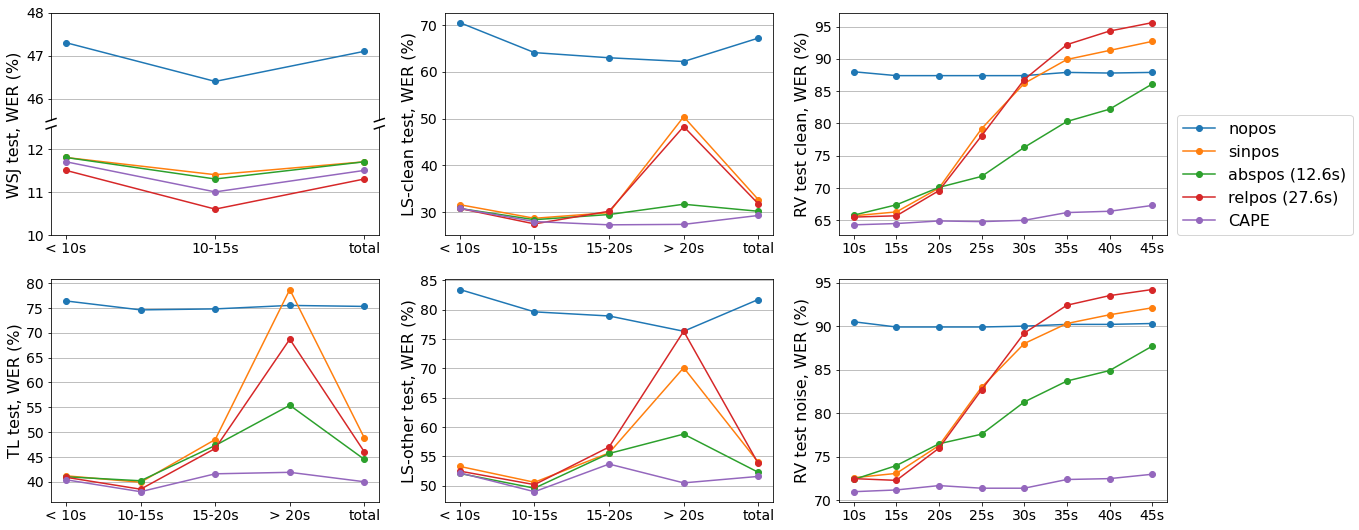

In [251]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig = plt.figure(figsize=(20, 9))
for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
    ax = plt.subplot(2, 3, index)
    if index == 1:
        divider = make_axes_locatable(ax)
        ax2 = divider.new_vertical(size="100%", pad=0.1)
        fig.add_axes(ax2)
        ax.set_ylim(10, 12.5)
        ax.tick_params(axis="both", labelsize=14)
        ax.spines['top'].set_visible(False)
        ax.grid(axis="y")
        ax2.set_ylim(45.5, 48)
        ax.set_ylabel("                      {} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
        ax2.tick_params(bottom=False, labelbottom=False)
        ax2.spines['bottom'].set_visible(False)
        ax2.set_yticks([46, 47, 48])
        # From https://matplotlib.org/examples/pylab_examples/broken_axis.html
        d = .015  # how big to make the diagonal lines in axes coordinates
        # arguments to pass to plot, just so we don't keep repeating them
        kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
        ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
        ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

        kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
        ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
        ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    else:
        plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.grid(axis="y")
    for data, col, kw in zip([wsj_nopos, wsj_sinpos, wsj_abspos, wsj_relpos, wsj_cape, wsj_sinrelpos, wsj_relpos_200],
                              [0, 1, 2, 3, 4], ["", "", "", "", "", "", ""]):
        plot_eval(data, name, label="", color=colors[col], kw=kw, linewidth=1.5, ax=ax)
        if index == 1:
            plot_eval(data, name, label="", color=colors[col], kw=kw, linewidth=1.5, ax=ax2)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
for index, index2, name in zip([3, 6], [1, 2], ["test clean", "test noise"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, l, col, kw in zip([wsj_nopos_prod, wsj_sinpos_prod, wsj_abspos_prod, wsj_relpos_prod, wsj_cape_prod, wsj_relpos_200_prod],
                       ["nopos", "sinpos", "abspos (12.6s)", "relpos (27.6s)", "CAPE", "relpos 6s"],
                                [0, 1, 2, 3, 4], ["", "", "", "", "", ""]):
        plot_prod(data, index2, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("RV {}, WER (%)".format(name), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 3):
        plt.legend(fontsize=16, loc=(1.03, 0), ncol=1)
plt.savefig("wsj.png", dpi=300, bbox_inches="tight")

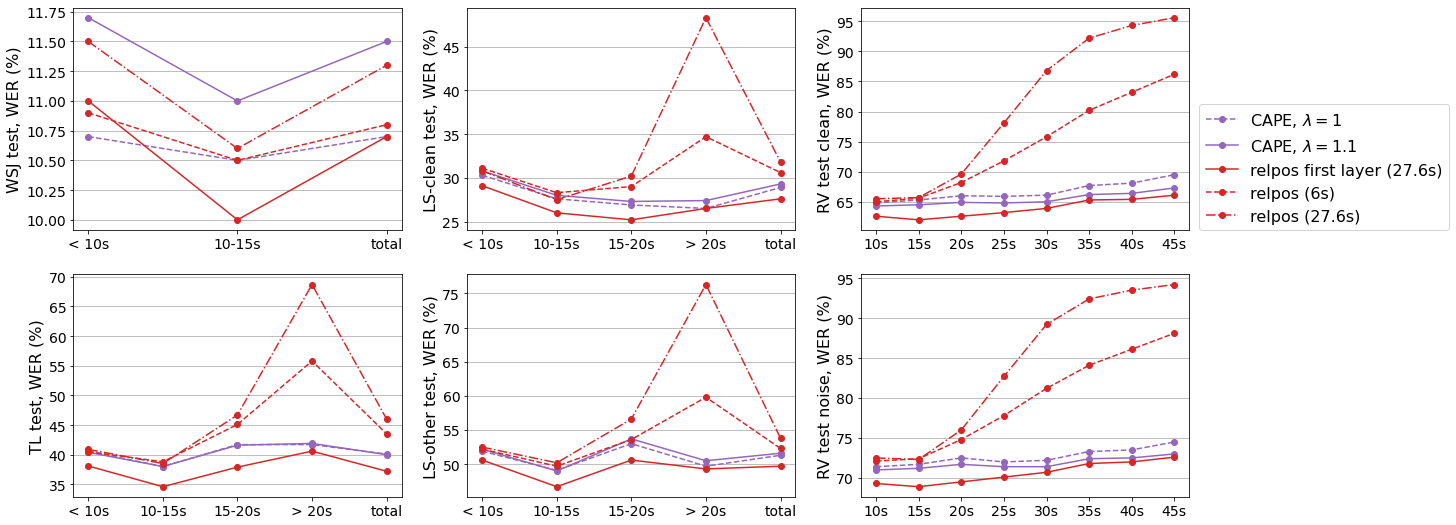

In [252]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(20, 9))
for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw in zip([wsj_cape_no_scale, wsj_cape, wsj_relpos_one, wsj_relpos_200, wsj_relpos],
                              [4, 4, 3, 3, 3], ["--", "", "", "--", "-."]):
        plot_eval(data, name, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
for index, index2, name in zip([3, 6], [1, 2], ["test clean", "test noise"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, l, col, kw in zip([wsj_cape_no_scale_prod, wsj_cape_prod, wsj_relpos_one_prod, wsj_relpos_200_prod, wsj_relpos_prod],
                       ["CAPE, $\lambda=1$", "CAPE, $\lambda=1.1$", "relpos first layer (27.6s)", "relpos (6s)", "relpos (27.6s)"],
                                [4, 4, 3, 3, 3], ["--", "", "", "--", "-."]):
        plot_prod(data, index2, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("RV {}, WER (%)".format(name), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 3):
        plt.legend(fontsize=16, loc=(1.03, 0), ncol=1)
plt.savefig("wsj_ablation.png", dpi=300, bbox_inches="tight")

## WSJ learning curves

In [10]:
def plot_curve(path, logs, name, host, par1, color):
    updates = []
    dev_wer = []
    train_wer = []
    for log in logs:
        with open(path + log, "r") as f:
            for line in f:
                r = line.strip().split(" | ")
                updates.append(int(r[1].split(":")[1].strip().replace(" ", "")))
                train_wer.append(float(r[14].split(":")[1].strip().replace(" ", "")))
                dev_wer.append(float(r[17].split(":")[1].strip().replace(" ", "")))
    host.plot(updates, train_wer, label=name, color=color)
    par1.plot(updates, dev_wer, "k--", color=color)

In [11]:
# prefix = "/checkpoint/wav2letter/transfer_learning/aws/interspeech/models/"
# fig, host = plt.subplots(figsize=(20,8)) 
# par1 = host.twinx()
# host.grid(True)
# host.set_xlabel("Updates", fontsize=16)
# host.set_ylabel("Train word error rate (solid)", fontsize=16)
# par1.set_ylabel("Valid word error rate (dashed)", fontsize=16)
# # host.xticks(fontsize=12)
# # host.yticks(fontsize=12)
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# # plot_curve(prefix + "wsj_new_baseline_nopos/", ["001_log"], "nopos", host, par1, color=colors[0])
# plot_curve(prefix + "wsj_new_baseline/", ["001_log", "002_log"], "sinpos", host, par1, color=colors[1])
# plot_curve(prefix + "wsj_new_baseline_abspos/", ["001_log", "002_log"], "abspos", host, par1, color=colors[2])
# plot_curve(prefix + "wsj_new_baseline_relpos/", ["001_log", "002_log"], "relpos", host, par1, color=colors[3])
# plot_curve(prefix + "wsj_new_baseline_sinpos_trick_gl2000/", ["001_log", "002_log"], "CAPE (no scale)", host, par1, color=colors[4])
# plot_curve(prefix + "wsj_new_baseline_sinpos_trick_gl2000_scale1-1/", ["001_log"], "CAPE", host, par1, color=colors[5])
# plt.xlim(0, 200000)
# # plt.ylim([10, 20, 30, 40, 80])
# host.set_ylim(20, 100)
# par1.set_ylim(5, 20)
# host.legend(fontsize=16, loc=(0.2, 1.05), ncol=6)
# plt.savefig("wsj_lr_curve.pdf", dpi=300, bbox_inches="tight")

## TL

In [12]:
tl_sinpos = "11.5	12.6	21.4	12	9.7	10.3	9.9	6.8	7	9.1	23.3	10.2	8.4	6.2	9	19.9	7.9	9.5	9.5	13.7	34.3	11.8	20.2	19	23.1	49.8	21.6	10.2	8.4	12.8	32.8	12.4	21.4	18.3	24.8	47.1	22.6"
tl_sinpos_prod = """42.5 42.5 48.0 58.4 66.3 73.8 75.9 79.3 
24.5 24.1 30.0 42.3 53.6 62.2 67.2 71.9 
32.5 32.0 37.5 47.9 57.3 63.8 67.5 71.1 
44.0 43.5 48.3 58.4 67.5 74.5 79.2 82.8 
45.6 44.7 49.1 58.9 67.3 73.6 77.6 80.6"""

tl_relpos ="10.4	11.4	11.2	10.7	9.2	9.2	9.2	6.9	6.3	6.5	8.6	6.9	8.3	5.7	6.8	6	7	9.3	9.1	8.5	9.8	9.2	19.2	18.4	16	20.1	18.8	10	7.9	8.2	9	9.2	20.4	17.2	18	21	19.5"
tl_relpos_prod = """42.3 42.4 44.2 47.7 52.0 60.7 65.3 72.3 
23.4 22.9 24.1 26.7 31.7 40.0 48.0 57.7 
31.6 31.1 32.6 35.4 40.2 46.3 52.0 59.2 
43.9 43.3 44.7 48.8 55.5 63.8 72.1 80.2 
45.2 44.5 46.1 50.3 56.2 63.3 69.3 75.3"""

tl_relposone = "10.5	11.6	12.8	10.9	9.5	9.4	9.5	6.7	6.5	7.3	8.7	7.1	8.1	6.1	6.3	5.4	7.1	0	0	0	0	0	0	0	0	0	0	10	8.1	7.8	8.6	9.1	20.3	17.2	17.2	17.7	19.2"
tl_relposone_prod = """42.0 41.4 42.2 42.5 42.5 44.9 43.1 44.1 
23.3 22.7 22.9 22.9 23.1 24.5 23.3 23.6 
31.4 30.8 31.2 31.1 31.1 32.5 31.6 31.8 
43.2 42.4 42.5 42.5 42.6 43.6 43.2 44.0 
44.7 43.8 43.9 44.0 44.3 45.2 44.5 45.2"""

tl_relpos_200="10.5	11.3	13.9	10.8	9.1	9.2	9.1	6.5	6	7.1	9.1	6.9	8.1	5.8	6.1	6.1	6.9	0	0	0	0	0	0	0	0	0	0	9.6	7.7	7.2	8.5	8.8	19.6	16.8	16.7	18.1	18.7"
tl_relpos_200_prod = """41.2 41.0 42.3 43.6 44.7 48.3 47.7 49.7 
22.9 22.3 22.8 23.2 23.9 26.1 25.7 27.0 
30.9 30.3 31.2 31.9 32.8 34.8 34.8 36.0 
42.4 41.9 43.0 44.1 45.7 48.1 49.4 51.5 
43.9 43.3 44.2 45.5 47.1 49.3 50.1 51.9"""

tl_nopos = "11.1	12.1	12.8	11.4	9.6	10.1	9.7	7.5	7.2	8	10.3	8	8.9	6.4	7.5	6.6	7.7	10	9.7	9.7	9.6	9.8	20.4	19.6	17.7	19.6	20	10.5	9.1	8.7	9.4	9.8	21.5	18.8	18.9	18	20.4"
tl_nopos_prod = """42.8 42.1 42.8 43.0 42.8 45.5 44.0 44.8 
24.8 24.1 24.3 24.2 24.2 25.7 24.6 24.8 
32.7 32.0 32.4 32.4 32.2 33.6 32.7 33.0 
43.9 43.1 43.0 43.1 43.5 44.3 43.9 44.8 
45.1 44.4 44.4 44.6 44.9 45.8 45.3 46.0"""

tl_abspos = "11.1	11.9	12.3	11.3	9.6	9.7	9.6	7.2	6.6	7.7	9.6	7.5	8.2	6.2	6.7	5.9	7.2	0	0	0	0	0	0	0	0	0	0	10.2	8.2	8.2	8.8	9.3	20.2	17.3	17.9	18.4	19.2"
tl_abspos_prod = """41.8 41.6 42.7 43.7 44.2 47.4 45.8 47.4 
24.0 23.4 24.2 24.4 24.7 26.6 25.8 26.4 
32.1 31.6 32.7 32.9 33.4 35.2 34.6 35.2 
43.3 42.8 43.4 43.9 44.8 46.7 47.0 48.5 
44.8 44.1 44.7 45.6 46.4 48.1 48.1 49.3"""

tl_cape_no_scale = "10.6	11.45	11.2	10.9	9.2	9.7	9.3	6.7	6.5	7	8.7	7	8.1	6.1	6.3	5.5	7.1	9.4	9.1	9.2	9.1	9.3	19.5	18.8	17.3	17.9	19.1	10	8.1	8.4	8.5	9.2	20.6	17.4	18.7	16.9	19.6"
tl_cape_no_scale_prod = """42.6 41.9 42.2 42.4 42.3 44.7 43.0 44.0 
23.9 23.2 23.3 23.2 23.3 24.9 23.8 24.2 
31.9 31.1 31.3 31.2 31.3 32.7 31.7 32.0 
43.8 42.6 42.6 42.4 42.7 43.7 43.4 44.1 
45.1 43.7 43.6 43.8 44.0 45.0 44.4 45.3"""

tl_cape = "10.2	11.7	13.9	10.7	9.3	9.9	9.5	7.3	6.4	7.2	8.1	7.1	8.2	6.1	6.4	5.2	7.1	9.2	9	8.8	9.2	9.1	19.4	18.6	17	17.7	19	9.9	8.1	7.9	8.4	9.1	20.6	17.7	17.7	17.3	19.5"
tl_cape_prod = """42.8 42.3 42.9 43.3 43.4 45.6 44.2 45.2 
23.9 23.2 23.5 23.3 23.5 25.0 24.0 24.3 
32.0 31.4 31.7 31.6 31.9 33.1 32.4 32.7 
43.9 43.0 43.0 43.0 43.4 44.5 44.2 45.1 
45.5 44.4 44.5 44.8 45.2 46.1 45.7 46.6"""

tl_cape_no_scale_500 = "11	11.7	12.3	11.2	9.1	10.2	9.35	6.8	6.6	7.2	9	7.2	8.3	5.9	6.6	5.8	7.1	9.1	8.8	8.8	8.3	9	19.5	18.75	16.8	19	19.1	9.8	8.2	8	8.7	9.1	20.7	17.5	18.1	17.3	19.6"
tl_cape_no_scale_500_prod = """42.0 41.2 42.1 42.3 42.4 45.6 45.4 48.5 
23.6 23.0 23.2 23.1 23.2 25.3 25.6 28.0 
31.7 31.0 31.3 31.2 31.4 33.2 33.7 35.8 
43.1 42.3 42.3 42.4 42.6 44.6 46.1 49.2 
44.7 43.5 43.5 43.9 44.4 46.2 47.3 49.8"""

tl_cape_no_scale_1000 = "10.5	11.7	12.8	10.9	9.1	10.8	9.6	6.8	7	7.3	8.3	7.2	8.3	5.9	6.4	6.7	7.1	9.4	9.2	8.7	8.5	9.2	19.6	18.9	17.1	18.1	19.2	10	8.2	8.2	8.8	9.2	20.5	18.1	17.9	18.4	19.6"
tl_cape_no_scale_1000_prod = """42.5 41.9 42.6 42.8 42.4 44.8 43.2 44.2 
23.7 23.1 23.3 23.1 23.3 24.6 23.6 23.9 
31.7 31.1 31.4 31.2 31.3 32.5 31.6 32.0 
43.7 42.9 42.7 42.6 42.7 43.8 43.3 44.0 
45.1 44.0 43.9 44.0 44.3 45.1 44.6 45.4"""

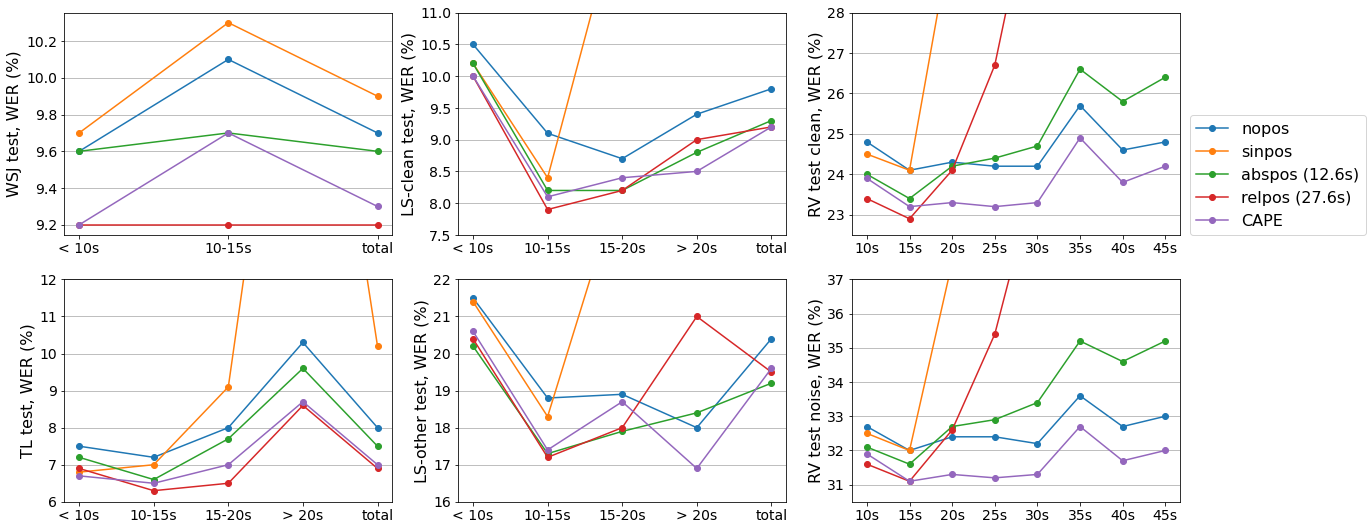

In [13]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(20, 9))
for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw in zip([tl_nopos, tl_sinpos, tl_abspos, tl_relpos, tl_cape_no_scale, tl_relpos_200],
                           [0, 1, 2, 3, 4], ["", "", "", "", "", ""]):
        plot_eval(data, name, label="", color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if index == 4:
        plt.ylim(6, 12)
    if index == 2:
        plt.ylim(7.5, 11)
    if index == 5:
        plt.ylim(16, 22)
for index, index2, name in zip([3, 6], [1, 2], ["test clean", "test noise"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw, l in zip([tl_nopos_prod, tl_sinpos_prod, tl_abspos_prod, tl_relpos_prod, tl_cape_no_scale_prod, tl_relpos_200_prod],
                         [0, 1, 2, 3, 4], ["", "", "", "", "", ""],
                            ["nopos", "sinpos", "abspos (12.6s)", "relpos (27.6s)", "CAPE", "relpos 6s"],):
        plot_prod(data, index2, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("RV {}, WER (%)".format(name), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 3):
        plt.legend(fontsize=16, loc=(1.03, 0), ncol=1)
    if index2 == 1:
        plt.ylim(22.5, 28)
    else:
        plt.ylim(30.5, 37)
plt.savefig("tl.png", dpi=300, bbox_inches="tight")

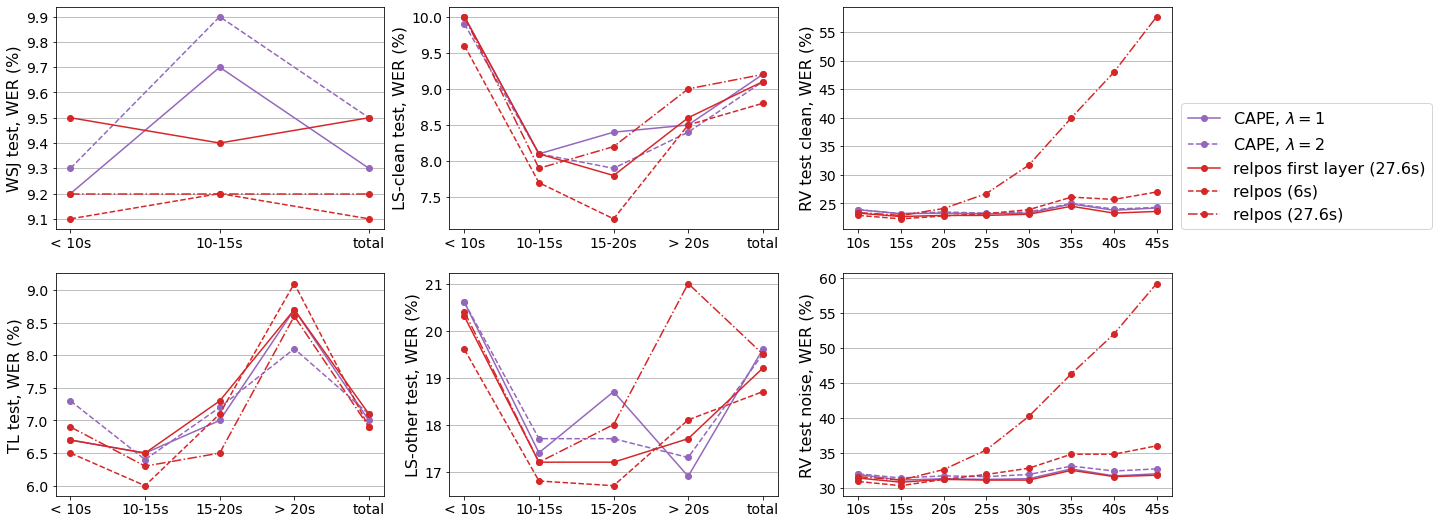

In [253]:
plt.figure(figsize=(20, 9))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw in zip([tl_cape_no_scale, tl_cape, tl_relposone, tl_relpos_200, tl_relpos],
                      [4, 4, 3, 3, 3], ["", "--", "", "--", "-."]):
        plot_eval(data, name, label=l, linewidth=1.5, color=colors[col], kw=kw)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
for index, index2, name in zip([3, 6], [1, 2], ["test clean", "test noise"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, l, kw in zip([tl_cape_no_scale_prod, tl_cape_prod, tl_relposone_prod, tl_relpos_200_prod, tl_relpos_prod], 
                                [4, 4, 3, 3, 3],
                                ["CAPE, $\lambda=1$", "CAPE, $\lambda=2$", "relpos first layer (27.6s)", "relpos (6s)", "relpos (27.6s)"],
                               ["", "--", "", "--", "-."]):
        plot_prod(data, index2, label=l, linewidth=1.5, color=colors[col], kw=kw)
    plt.ylabel("RV {}, WER (%)".format(name), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 3):
        plt.legend(fontsize=16, loc=(1.03, 0), ncol=1)
plt.savefig("tl_ablation.png", dpi=300, bbox_inches="tight")

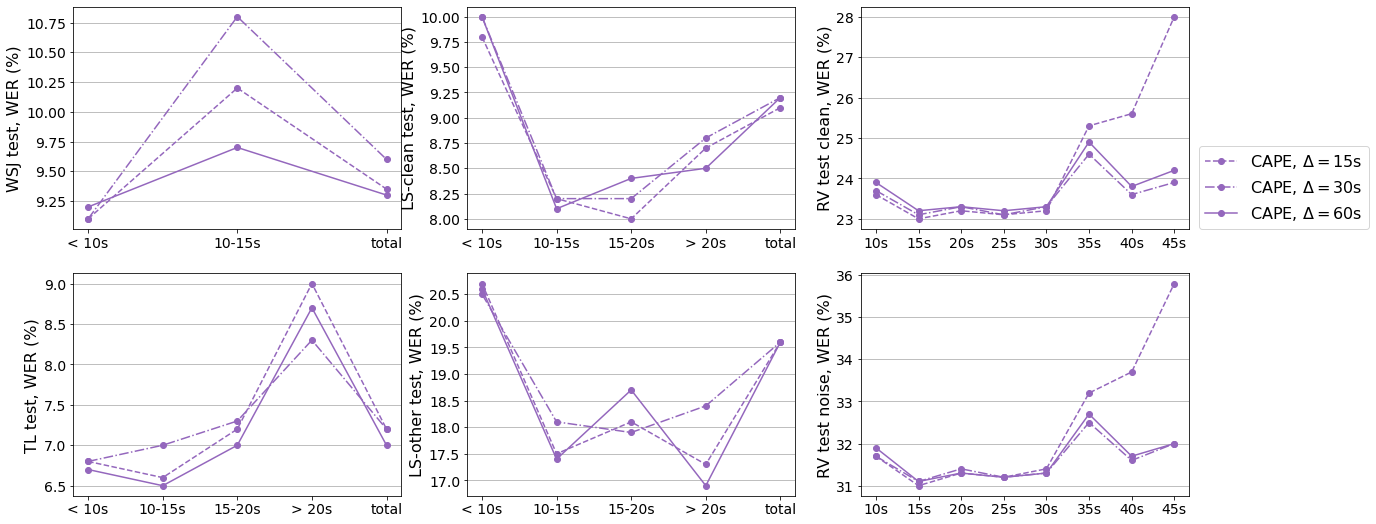

In [15]:
plt.figure(figsize=(20, 9))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw in zip([tl_cape_no_scale_500, tl_cape_no_scale_1000, tl_cape_no_scale], 
                      [4, 4, 4], ["--", "-.", ""]):
        plot_eval(data, name, label=l, linewidth=1.5, color=colors[col], kw=kw)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
for index, index2, name in zip([3, 6], [1, 2], ["test clean", "test noise"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, l, kw in zip([tl_cape_no_scale_500_prod, tl_cape_no_scale_1000_prod, tl_cape_no_scale_prod], 
                                [4, 4, 4],
                                ["CAPE, $\Delta=15$s", "CAPE, $\Delta=30$s", "CAPE, $\Delta=60$s"],
                               ["--", "-.", ""]):
        plot_prod(data, index2, label=l, linewidth=1.5, color=colors[col], kw=kw)
    plt.ylabel("RV {}, WER (%)".format(name), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 3):
        plt.legend(fontsize=16, loc=(1.03, 0), ncol=1)
plt.savefig("tl_ablation_global.png", dpi=300, bbox_inches="tight")

## TL augment

In [260]:
def plot_curve(path, logs, name, color, kw="", use_train=False):
    updates = []
    dev_wer = []
    train_wer = []
    for log in logs:
        with open(path + log, "r") as f:
            for line in f:
                r = line.strip().split(" | ")
                updates.append(int(r[1].split(":")[1].strip().replace(" ", "")))
                train_wer.append(float(r[14].split(":")[1].strip().replace(" ", "")))
                dev_wer.append(float(r[17].split(":")[1].strip().replace(" ", "")))
    if use_train:
        plt.plot(updates, train_wer, kw, label=name, color=color, linewidth=2)
    else:
        plt.plot(updates, dev_wer, kw, label=name, color=color, linewidth=2)

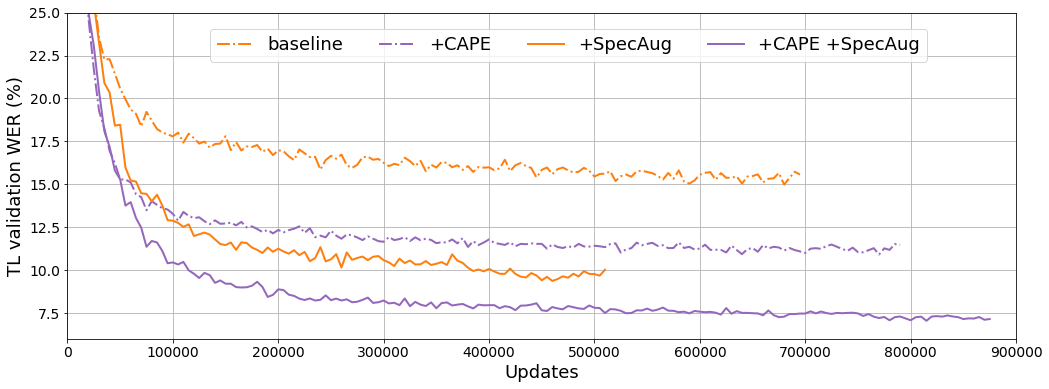

In [271]:
prefix = "/checkpoint/wav2letter/transfer_learning/aws/interspeech/models/"
plt.figure(figsize=(17, 6)) 
plt.grid(True)
plt.xlabel("Updates", fontsize=18)
plt.ylabel("TL validation WER (%)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', #'#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plot_curve(prefix + "tl_new_baseline_saug_start_update100000000/", ["001_log", "002_log", "003_log", "004_log"], "baseline", color=colors[1], kw="-.")
plot_curve(prefix + "tl_new_baseline_gl2000_saug_start_update100000000/", ["001_log", "002_log", "003_log",  "004_log", "005_log"], "+CAPE", color=colors[3], kw="-.")
plot_curve(prefix + "tl_new_baseline/", ["001_log", "002_log"], "+SpecAug", color=colors[1])
plot_curve(prefix + "tl_new_baseline_gl2000/", ["001_log", "002_log", "003_log", "004_log", "005_log", "006_log"], "+CAPE +SpecAug", color=colors[3])
plt.xlim(0, 900000)
plt.ylim(6, 25)
# plt.ylim(10, 17)
# plt.ylim([10, 20, 30, 40, 80])
plt.legend(fontsize=18, loc=(0.15, 0.85), ncol=4)
plt.savefig("tl_aug.png", dpi=300, bbox_inches="tight")

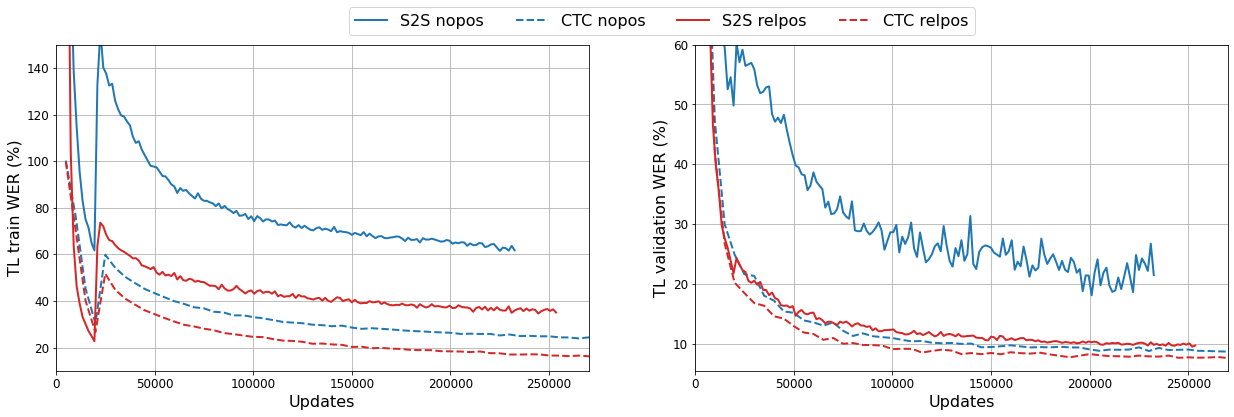

In [276]:
prefix = "/checkpoint/wav2letter/transfer_learning/aws/interspeech/models/"
plt.figure(figsize=(21, 6)) 
for n, plot_type in enumerate([True, False]):
    plt.subplot(1, 2, n + 1)
    plt.grid(True)
    plt.xlabel("Updates", fontsize=16)
    if n == 0:
        plt.ylabel("TL train WER (%)", fontsize=16)
    else:
        plt.ylabel("TL validation WER (%)", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    plot_curve(prefix + "tl_new_baseline_s2s_nopos_v3/", ["001_log", "002_log", "003_log"], "S2S nopos", color=colors[0], kw="", use_train=plot_type)
    plot_curve(prefix + "tl_new_baseline_nopos/", ["001_log", "002_log"], "CTC nopos", color=colors[0], kw="--", use_train=plot_type)
    # plot_curve(prefix + "tl_new_baseline_s2s_sinpos_v3/", ["001_log", "002_log"], "sinpos", color=colors[1], kw="")
    plot_curve(prefix + "tl_new_baseline_s2s_relpos_v3/", ["001_log", "002_log"], "S2S relpos", color=colors[3], use_train=plot_type)
    plot_curve(prefix + "tl_new_baseline_relpos/", ["001_log", "002_log", "003_log", "004_log"], "CTC relpos", color=colors[3], kw="--", use_train=plot_type)
    plt.xlim(0, 270000)
    if n == 1:
        plt.ylim(5.5, 60)
        plt.legend(fontsize=16, loc=(-0.65, 1.03), ncol=4)
    else:
        plt.ylim(10, 150)
plt.savefig("tl_s2s.png", dpi=300, bbox_inches="tight")

# Vision

In [19]:
def plot_vit(ax, data, label, index=0, color="r", kw="", linewidth=1):
    x = ["160x160", "224x224", "384x384", "672x672"]
    top1 = [float(elem.split("/")[0].strip()) for elem in data.split("\t")]
    y = top1[index * 4 : (index + 1) * 4]
    ax.plot(x, y, kw, linewidth=linewidth, marker="o", markersize=4, label=label, color=color)

In [181]:
nopos = "75.194 / 92.154	79.11 / 94.372	78.954 / 94.234	72.28 / 90.72 ?	70.98 / 90.31	75.18 / 93.12	74.16 / 92.54	66.18 / 87.79	62.38 / 82.98	67.82 / 86.84	67.01 / 87.29	58.77 / 81.68	76.33 / 93.44	79.72 / 95.37	78.51 / 94.87	 71.08 / 91.07"
abspos = "77.782/93.446	80.904/95.26	79.898/94.714	72.206/90.488	73.38/91.8	77.01/93.91	75.66/93.24	65.47/87.13	65.07/85.34	69.38/88.52	68.05/87.77	57.69/80.23	78.53/94.52	81.53/96.17	80.14/95.43	70.9/90.76"
sin2d_base10 = "77.68 / 93.38	81.39 / 95.506	79.84 / 94.52	70.69 / 89.542	73.29 / 92.08	77.97 / 94.47	75.51 / 93.14	63.54 / 85.78	65.06 / 85.32	70.46 / 89.2	67.76 / 87.34	55.45 / 78.16	78.58 / 94.49	82.19 / 96.5	79.77 / 95.17	69.45 / 89.17"
cape_no_scale_base10 ="77.236 /93.324	80.758 / 95.222	80.34 / 94.954	72.682 / 91.162	73.07 / 91.97	77.57 / 94.19	76.08 / 93.76	66.09 / 87.93	65.08 / 85.28	69.86 / 88.58	69.16 / 88.32	58.55 / 81.63	78.19 / 94.55	82.01 / 96.15	80.68 / 95.85	71.92 / 91.36"
cape_base10 = "77.5 / 93.312	81.16 / 95.438	80.63 / 95.088	73.43 / 91.436	73.12 / 91.86	77.53 / 94.33	76.12 / 93.62	66.97 / 88.66	64.97 / 85.49	70.25 / 88.71	69.45 / 88.7	59.99 /82.18	78.52 / 94.61	81.88 / 96.3	80.83 / 95.55	72.25 / 91.85"

nopos_ft = "35.964 / 55.904	75.62 / 92.512	80.77 / 95.246	79.32 / 94.4	32.37 / 52.2	71.52 / 90.69	77.16 / 93.8	74.63 / 92.95	26.03 / 44.58	63.24 / 83.44	69.61 / 88.46	67.45 / 87.61	37.93 / 58.86	76.44 / 93.52	81.06 / 95.83	78.8 / 95.02"
abspos_ft = "34.164/54.056	78.51/93.958	82.346/95.96	80.632/95.112	29.71/49.48	75.02/92.58	79.1/95.11	76.1/93.6	24.45/42.31	66.54/86.42	71.91/90.19	68.79/88.39	35.76/56.36	79.33/95.12	83.15/96.85	80.63/95.8"
sin2d_ft_base10 = "29.708 / 48.22	78.40 / 94.026	82.894 / 96.112	80.992 / 95.14	25.92 / 43.54	74.45 / 92.51	79.48 / 95.24	76.24 / 93.79	20.86 / 36.91	66.55 / 86.41	72.52 / 90.48	69.41 / 88.44	30.82 / 49.74	79.59 / 95.15	83.74 / 96.96	80.78 / 95.74"
cape_no_scale_ft_base10 = "55.766 / 77.614	78.168 / 94.084	82.39 / 96.118	80.972 /95.336	51.37 / 74.62	75 / 92.67	79.32 / 95.11	76.4 / 94.27 	42.94 / 64.9	66.7 / 86.21	71.92 / 89.91	69.55 / 88.91	58.21 / 80.08	79.57 / 95.21	83.12 / 96.85	81.07 / 96.07"
cape_ft_base10 = "57.908 / 78.962	78.386 / 94.01	82.786 / 96.146	81.048 / 95.264	52.81 / 75.59	74.79 / 92.58	79.33 / 95.06	76.7 / 93.8	44.48 / 66.55	66.74 / 86.15	72.43 / 90.41	70.19 / 88.89	59.61 / 81.67	79.54 / 95.07	83.51 / 96.68	81.2 / 95.88"

abspos_160 = "78.974/94.298	79.544/94.63	74.84/92.262	58.648/82.03	74.97/92.98	75.18/93.27	68.96/89.53	50.66/76.02	67.1/86.53	67.55/87.11	61.33/83.32	43.43/68.34	79.94/95.32	80.04/95.47	74.33/92.88	56.49/80.99"
cape_160 = "78.34 / 94.056	79.10 / 94.552	75.22 / 92.534	61.91 / 84.648	74.17 / 92.52	75.47 / 93.27	70 / 90.24	54.57 / 79.35	65.85 / 86.11	67.77 / 87.16	62.77 / 84.38	47.08 / 72.2	79.1 / 95.23	80.06 / 95.5	75.41 / 93.65	60.2 / 84.28"
sin2d_160_base10 = "78.94 /94.25	73.814 / 91.594	63.98 / 85.15	40.26 / 64.514	74.79 / 92.73	69.92 / 90.09	57.08 / 81.13	32.61 / 56.97	66.74 / 86.52	61.72 / 82.9	49.98 / 73.82	27.03 / 49.77	79.6 / 95.36	75.38 / 93.06	63.41 / 85.66	38.04 / 62.84"
cape_no_scale_160_base10 = "78.388 / 93.886	79.296 / 94.438	74.974 / 92.466	60.366 / 83.706	74.06 / 92.65	75.38 / 93.08	69.57 / 90.16	52.37 / 77.82	65.82 / 86.27	67.8 / 87.05	62.29 / 83.79	45.51 / 70.75	78.79 / 95.29	80.11 / 95.64	75.02 / 93.16	58.21 / 83.12"
cape_160_base10 = "78.788 / 94.056	79.954 / 94.878	76.354 / 93.088	63.026 / 85.374	74.79 / 93.02	75.99 /93.55	71.42 / 91.47	56.15 / 80.92	66.94 / 86.29	68.12 / 87.81	63.75 / 85.16	48.52 / 73.37	79.52 / 95.28	80.43 / 95.87	76.46 / 94.43	61.76 / 85.36"

abspos_384 = "23.732/40.482	72.274/89.732	80.382/94.71	78.898/93.868	20.7/37.14	67.43/86.71	75.81/93.07	72.87/91.84	17.35/31.82	58.77/78.91	68.19/87.73	65.75/85.92	25.52/42.91	72.9/90.81	79.9/95.44	77.64/94.42"
sin2d_384_base10 = "9.184 / 18.364	74.712 / 91.536	82.366 / 95.672	80.678 / 94.696	8.25 / 16.95	70.04 / 89.24	78.97 / 94.54	75.95 / 92.88	6.45 / 14.17	61.29 / 81.84	71.52 / 89.53	68.64 / 87.5	10.15 / 19.75	75.19 / 92.65	82.99 / 96.46	80.02 / 95.03"
cape_384 = "36.788 / 56.898 	73.75 / 90.512	81.25 / 94.92	79.69 / 94.222	32.5 / 52.39	68.13 / 87.73	77.24 / 93.55	74.73 / 92.22	26.77 / 44.56	59.76 / 80.38	69.57 / 87.94	67.77 / 86.45	38.61 / 58.74	73.81 / 91.29	81.71 / 95.64	79.28 / 94.56"
cape_no_scale_384_base10 = "32.306 / 50.914	75.642 / 91.956	82.344 / 95.732	80.742 / 94.842	28.96 / 46.9	70.78 / 89.71	78.81 / 94.35	76.67 / 93.21	23.45 / 39.75	62.3 / 82.64	71.47 / 89.34	69.37 / 87.81	34.14 / 53.49	76.21 / 92.88	82.83 / 96.41	80.87 / 95.31"
cape_384_base10 = "31.53 /50.394	75.368 / 91.948	82.6 / 95.954	81.152 / 95.268	27.9 / 46.91	71.03 / 89.87	79.16 / 94.9	77.06 / 94.01	23.18 / 40.37	62.13 / 82.82	72.24 / 89.85	70.23 / 88.75	33.49 / 54.06	76.08 / 92.96	83.39 / 96.84	81.25 /95.97"

cape_no_scale_mix = "78.232 / 93.794	80.06 / 94.848	80.81 / 95.232	78.99 / 94.466	74.16 / 92.69	76.38 / 93.88	77.21 / 94.5	74.89 / 93.27	65.95 / 86.06	68.96 / 87.91	69.94 / 89.07	67.12 / 87.56	79.14 / 95.4	81.12 / 95.98	81.7 / 96.42	79.48 / 95.46"
cape_mix = "78.01 / 93.744	79.908 / 94.83	80.788 / 95.396	79.452 / 94.684	73.89 / 92.48	76.72 / 93.61	77.34 / 94.18	75.22 / 93.28	65.32 / 85.78	68.41 / 87.87	68.89 / 88.83	67.88 / 87.35	78.89 / 94.98	81.05 / 96.06	81.93 / 96.27	79.99 / 95.57"
cape_mix_128_320 = "78.462 / 94.06	80.694 / 95.264	82.106 / 96.026	82 / 95.992	74.73 / 92.67	77.2 / 94.03	78.56 / 94.77	78.28 / 94.91	66.46 / 85.99	69.38 /88.26	71.25 / 89.75	71.13 / 89.69	79.52 / 95.29	81.72 / 96.3	82.51 / 96.73	82.27 / 96.7"
sin2d_mix_128_320_base10 = "78.944 / 94.216	80.824 / 95.4	82.306 / 96.036	82.118 / 95.964	74.64 / 92.93	77.21 / 94.28	78.58 / 94.93	78.29 / 94.76	66.57 / 86.55	69.74 / 88.8	71.48 / 89.98	71.42 / 89.93	79.53 / 95.28	81.67 / 96.31	82.82 / 96.73	82.53 / 96.65"
cape_no_scale_mix_128_320_base10 = "79.136 / 94.392	81.26 / 95.558	82.55 / 96.176	82.34 / 96.016	74.85 / 93.02	77.85 /94.48	79.42 / 95.23	78.76 / 95.19	67.07 / 86.72	69.97 / 88.91	72.03 / 90.3	71.54 / 90.33	79.74 / 95.29	82.09 / 96.4	83.26 / 97	82.75 / 96.84"
cape_mix_128_320_base10 = "79.05 / 94.354	81.164 / 95.438	82.282 /96.044	81.834 / 95.716	74.88 / 92.92	77.5 / 94.36	78.96 / 95.11	77.87 / 94.69	67.08 / 86.76	69.88 / 89.18	72.01 / 90.45	70.99 / 89.68	79.78 / 95.5	82.06 / 96.42	83.1 / 96.87	82.21 / 96.37"

abspos_tiny = "64.758/86.538	71.914/90.928	70.208/90.156	56.122/80.804	61.03/85.59	68.78/90.13	66.3/88.48	49.62/76.1	51.88/76.5	59.67/82.39	58.09/81.41	42.71/68.03	67.97/89.74	74.13/93.25	71.92/91.81	55.63/81"
abspos_small = "74.888/92.126	79.456/94.692	77.828/94.094	64.318/85.75	70.89/90.78	75.83/93.74	73.45/92.97	57.4/81.28	62.04/83.44	68.12/87.62	65.86/86.72	49.22/73.72	76.15/93.82	80.54/95.95	78.52/95.3	63.24/85.73"
univit_tiny = "65.246/86.942	69.826/89.738	72.438/91.332	71.152/90.798	62.2/86.03	66.4/88.79	68.99/90.35	67.45/89.25	53.35/77.33	57.25/80.97	61.3/83.42	59.72/82.41	69.15/90.17	72.64/92.31	74.93/93.44	73.23/92.37"
univit_small = "76.05/92.982	79.004/94.642	80.644/95.526	80.308/95.346	72.57/92.08	75.56/93.98	77.59/95.03	76.66/94.65	64/85.15	67.31/87.92	70.25/89.64	69.41/89.02	78.13/94.88	80.44/96	81.98/96.72	81.3/96.37"

### generalization 224 main

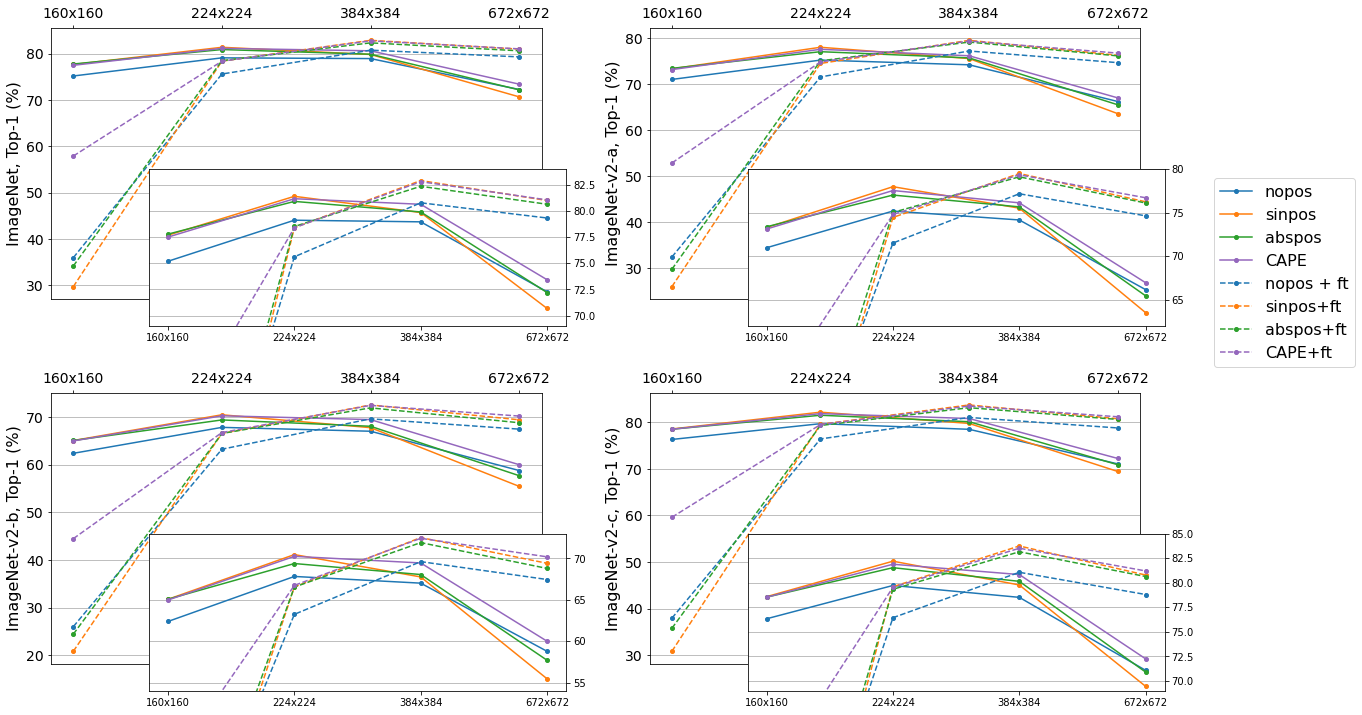

In [22]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', #'#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(19, 10))
for index, name, lim in zip(range(4), ["ImageNet", "ImageNet-v2-a", "ImageNet-v2-b", "ImageNet-v2-c"], 
                            [(69, 84), (62, 80), (54, 73), (69, 85)]):
    ax = plt.subplot(2, 2, index + 1)
    ax.grid(axis="y")
    for n, (data, l) in enumerate(zip([nopos, sin2d_base10, abspos, cape_base10],
                   ["nopos", "sinpos", "abspos", "CAPE"])):
        plot_vit(ax, data, label=l, index=index, color=colors[n], linewidth=1.5)
    for n, (data, l) in enumerate(zip([nopos_ft, sin2d_ft_base10, abspos_ft, cape_ft_base10],
                   ["nopos + ft", "sinpos+ft", "abspos+ft", "CAPE+ft"])):
        plot_vit(ax, data, label=l, index=index, color=colors[n], kw="k--", linewidth=1.5)
    plt.ylabel("{}, Top-1 (%)".format(name), fontsize=16)
    ax.xaxis.tick_top()
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
#     ax.plot([0, 1], [ideal_160[index], ideal_224[index]], "k--", color="grey", marker='x', alpha=0.7)

    if (index == 1):
        plt.legend(fontsize=16, loc=(1.15, -0.25), ncol=1)

    axins = ax.inset_axes([0.2, -0.1, 0.85, 0.58])
    
    for n, (data, l) in enumerate(zip([nopos, sin2d_base10, abspos, cape_base10],
                   ["nopos", "sinpos", "abspos", "CAPE"])):
        plot_vit(axins, data, label=l, index=index, color=colors[n], linewidth=1.5)
    for n, (data, l) in enumerate(zip([nopos_ft, sin2d_ft_base10, abspos_ft, cape_ft_base10],
                   ["nopos + ft", "sinpos+ft", "abspos+ft", "CAPE+ft"])):
        plot_vit(axins, data, label=l, index=index, color=colors[n], kw="k--", linewidth=1.5)

    # sub region of the original image
    axins.set_ylim(*lim)
    axins.grid(axis="y")
    axins.yaxis.tick_right()
#     axins.set_xticklabels('')
#     axins.set_xticks([])
#     axins.set_yticklabels('')

#     ax.indicate_inset_zoom(axins)
plt.tight_layout()
plt.savefig("vit_base10.png", dpi=300, bbox_inches="tight")

In [333]:
def parse(a):
    res = ""
    for i, k in enumerate(a.split("\n")):
        if i % 2 == 0:
            b= str(k)
        else:
            res += str(k) + "/" + b + " "
    return res

In [340]:
q = """93.314
77.404
95.258
80.992
94.988
80.388
91.296
73.466
91.6
73.28
94.31
77.51
93.82
76.3
88.22
66.99
84.91
65.16
88.7
69.8
88.17
68.8
81.56
59.38
94.47
78.46
96.37
81.73
95.83
80.73
91.65
71.85"""

In [341]:
parse(q)

'77.404/93.314 80.992/95.258 80.388/94.988 73.466/91.296 73.28/91.6 77.51/94.31 76.3/93.82 66.99/88.22 65.16/84.91 69.8/88.7 68.8/88.17 59.38/81.56 78.46/94.47 81.73/96.37 80.73/95.83 71.85/91.65 '

In [342]:
cape_no_scale_no_global = "77.532/93.294 81.084/95.212 80.18/94.73 72.344/90.558 73.41/91.47 77.61/93.73 75.81/92.91 65.99/87.42 64.85/84.8 70.23/88.26 68.22/87.69 57.83/80.74 78.33/94.43 82.05/96.14 80.06/95.37 70.99/90.6".replace(" ", "\t")
cape_no_scale_no_local = "77.458/93.372 81.144/95.416 80.488/94.966 72.132/90.722 73.35/91.46 77.9/94.29 76.36/93.26 64.95/86.82 64.84/85.26 69.84/88.87 68.45/88.15 57.31/80.26 78.8/94.47 81.84/96.22 80.58/95.61 70.53/90.34".replace(" ", "\t")
cape_no_global = "77.35/93.19 81.08/95.42 80.502/94.998 73.108/91.304 73.05/91.94 77.59/94.38 76.73/93.75 67.25/88.13 64.98/85.13 69.75/88.97 69.14/88.52 59.01/82.01 78.32/94.63 81.88/96.27 81/96.01 72.04/91.4".replace(" ", "\t")
cape_no_local = "77.706/93.256 81.296/95.318 80.572/94.942 73.354/91.246 73.51/91.92 77.71/94.24 76.72/93.63 66.58/87.8 65.01/84.88 69.93/88.64 69.59/88.26 59.31/81.1 78.02/94.65 81.93/96.18 80.86/95.51 71.73/90.99".replace(" ", "\t")

cape_no_scale_no_global2 = "77.532/93.416 81.236/95.434 79.798/94.69 71.278/90.028 72.98/91.44 77.37/94.16 75.3/92.86 64.02/86.19 64.5/85.24 70.05/88.71 68.17/87.45 56.37/79.24 78.17/94.38 82.35/96.36 80.02/95.44 69.83/89.79".replace(" ", "\t")
cape_no_scale_no_local2 = "77.548/93.226 81.154/95.366 80.288/94.808 71.832/90.344 73.72/91.39 77.65/94.19 75.74/93.25 64.82/86.64 65.51/84.49 69.94/88.6 68.35/88 57.4/79.92 78.49/94.27 81.74/96.28 80.51/95.58 70.32/89.97".replace(" ", "\t")
cape_no_global2 = "77.792/93.346 81.108/95.33 80.374/94.91 72.81/90.98 73.21/91.86 77.14/94.03 76/93.25 66.2/87.65 65.1/85.09 70.01/88.67 68.86/88.1 58.99/81.17 78.25/94.55 81.88/96.27 80.73/95.7 71.8/90.96".replace(" ", "\t")
cape_no_local2 = "77.404/93.314 80.992/95.258 80.388/94.988 73.466/91.296 73.28/91.6 77.51/94.31 76.3/93.82 66.99/88.22 65.16/84.91 69.8/88.7 68.8/88.17 59.38/81.56 78.46/94.47 81.73/96.37 80.73/95.83 71.85/91.65".replace(" ", "\t")

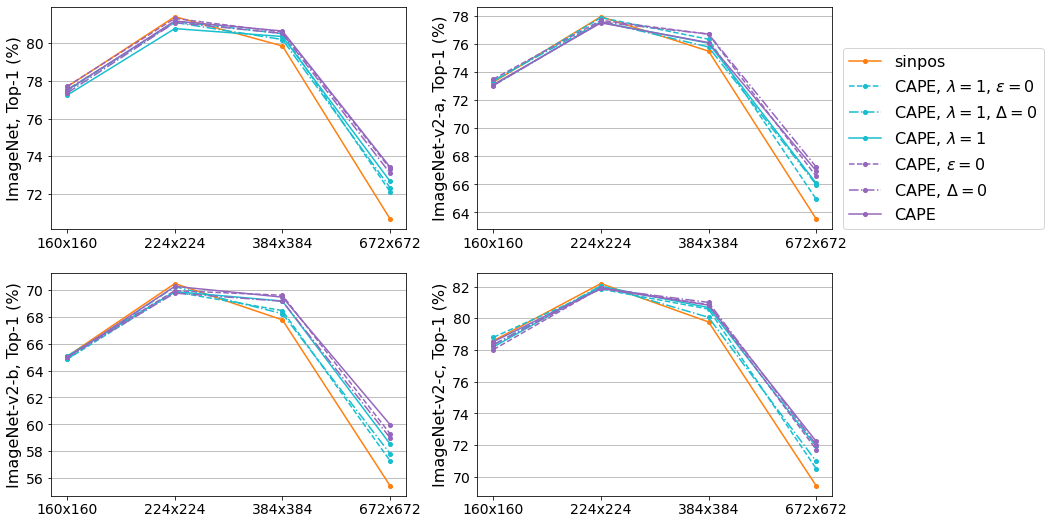

In [372]:
plt.figure(figsize=(14, 9))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for index, name in zip(range(4), ["ImageNet", "ImageNet-v2-a", "ImageNet-v2-b", "ImageNet-v2-c"]):
    ax = plt.subplot(2, 2, index + 1)
    plt.grid(axis="y")
    for n, (data, l, c, kw) in enumerate(zip([cape_base10, cape_no_global, cape_no_local, cape_no_scale_base10, cape_no_scale_no_global, cape_no_scale_no_local, sin2d_base10][::-1],
                       ["CAPE", "CAPE, $\Delta=0$", "CAPE, $\epsilon=0$", "CAPE, $\lambda=1$", "CAPE, $\lambda=1$, $\Delta=0$", "CAPE, $\lambda=1$, $\epsilon=0$", "sinpos"][::-1],
                                        [1, 9, 9, 9, 4, 4, 4], ["", "--", "-.", "", "--", "-.", ""])):
        plot_vit(ax, data, label=l, index=index, color=colors[c], linewidth=1.5, kw=kw)
    plt.ylabel("{}, Top-1 (%)".format(name), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 1):
        plt.legend(fontsize=16, loc=(1.03, 0), ncol=1)
plt.savefig("vit_ablation.png", dpi=300, bbox_inches="tight")

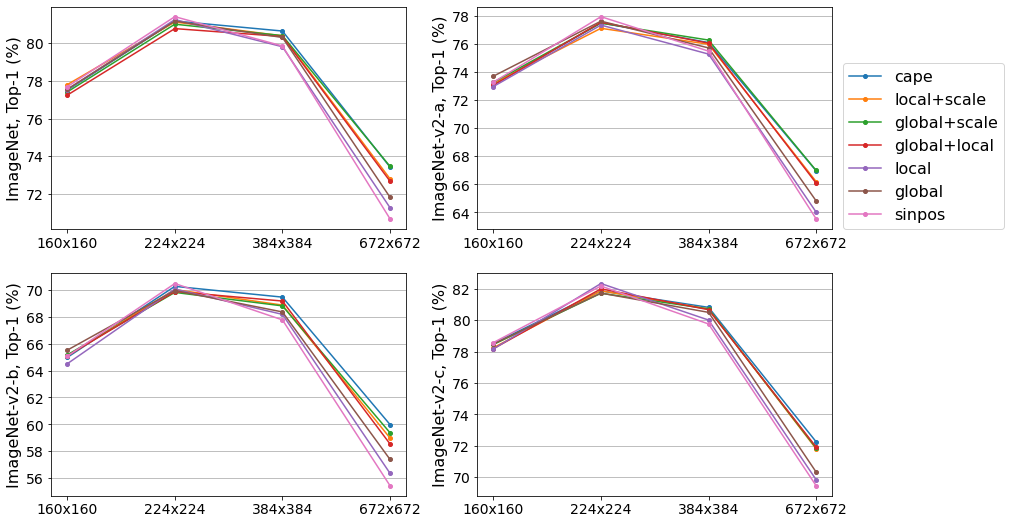

In [344]:
plt.figure(figsize=(14, 9))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for index, name in zip(range(4), ["ImageNet", "ImageNet-v2-a", "ImageNet-v2-b", "ImageNet-v2-c"]):
    ax = plt.subplot(2, 2, index + 1)
    plt.grid(axis="y")
    for n, (data, l) in enumerate(zip([cape_base10, cape_no_global2, cape_no_local2, cape_no_scale_base10, cape_no_scale_no_global2, cape_no_scale_no_local2, sin2d_base10],
                       ["cape", "local+scale", "global+scale", "global+local", "local", "global", "sinpos"])):
        plot_vit(ax, data, label=l, index=index, color=colors[n], linewidth=1.5)
    plt.ylabel("{}, Top-1 (%)".format(name), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 1):
        plt.legend(fontsize=16, loc=(1.03, 0), ncol=1)
plt.savefig("vit_ablation.png", dpi=300, bbox_inches="tight")

### scale vs no scale ablation

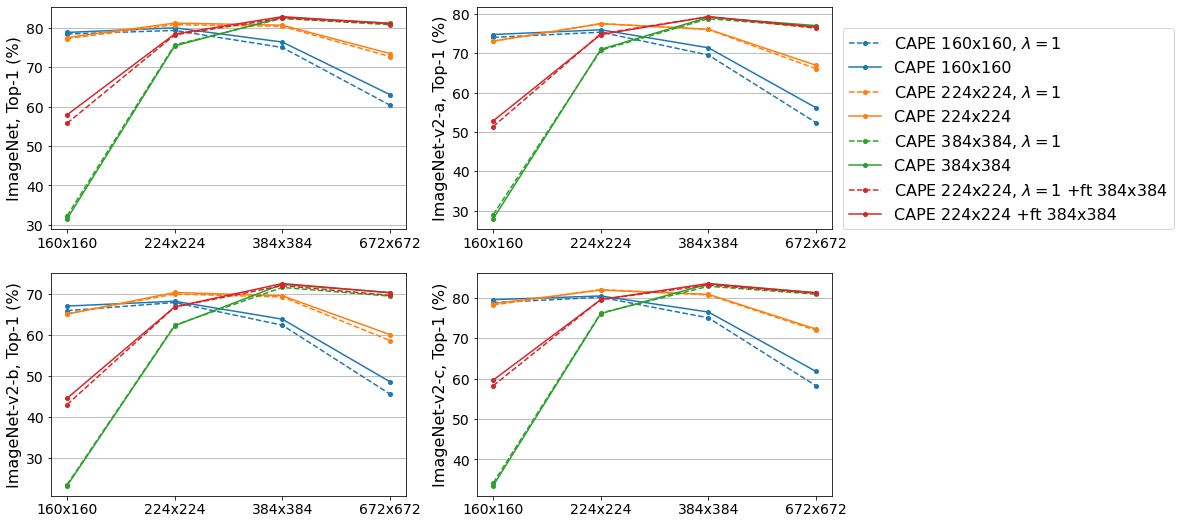

In [23]:
plt.figure(figsize=(14, 9))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for index, name in zip(range(4), ["ImageNet", "ImageNet-v2-a", "ImageNet-v2-b", "ImageNet-v2-c"]):
    ax = plt.subplot(2, 2, index + 1)
    plt.grid(axis="y")
    for n, (data, l) in enumerate(zip([cape_no_scale_160_base10, cape_160_base10, cape_no_scale_base10, cape_base10, cape_no_scale_384_base10, cape_384_base10,
                                      cape_no_scale_ft_base10, cape_ft_base10],
                       ["CAPE 160x160, $\lambda=1$", "CAPE 160x160", "CAPE 224x224, $\lambda=1$", 
                        "CAPE 224x224", "CAPE 384x384, $\lambda=1$", "CAPE 384x384",
                       "CAPE 224x224, $\lambda=1$ +ft 384x384", "CAPE 224x224 +ft 384x384"])):
        plot_vit(ax, data, label=l, index=index, color=colors[n // 2], kw="" if n % 2 == 1 else "--", linewidth=1.5)
    plt.ylabel("{}, Top-1 (%)".format(name), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 1):
        plt.legend(fontsize=16, loc=(1.03, 0), ncol=1)
plt.savefig("vit_scale_ablation.png", dpi=300, bbox_inches="tight")

### cape vs sin2d ablation

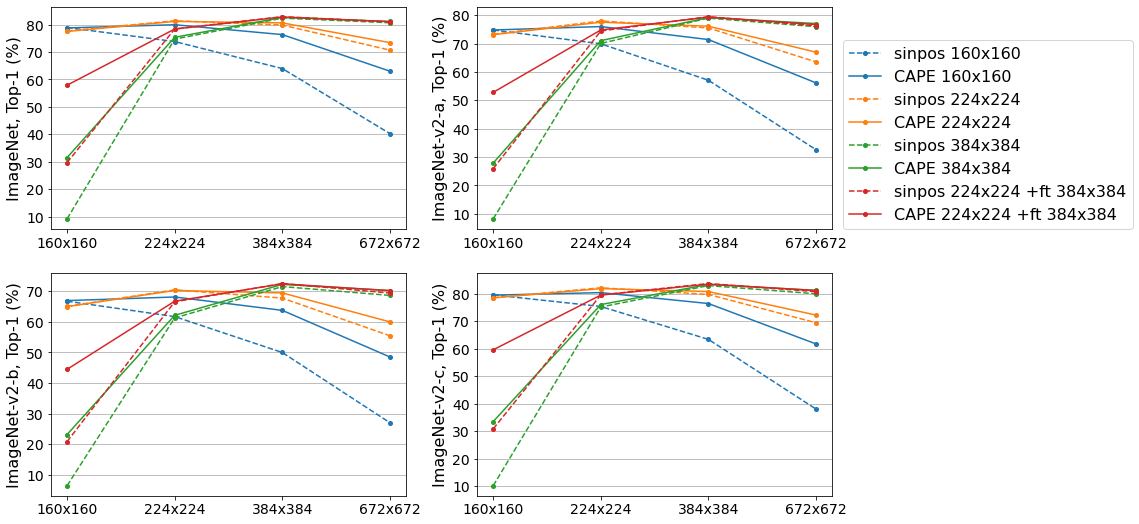

In [173]:
plt.figure(figsize=(14, 9))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for index, name in zip(range(4), ["ImageNet", "ImageNet-v2-a", "ImageNet-v2-b", "ImageNet-v2-c"]):
    ax = plt.subplot(2, 2, index + 1)
    plt.grid(axis="y")
    for n, (data, l) in enumerate(zip([sin2d_160_base10, cape_160_base10, sin2d_base10, cape_base10, sin2d_384_base10, cape_384_base10, sin2d_ft_base10, cape_ft_base10],
                       ["sinpos 160x160", "CAPE 160x160", "sinpos 224x224", "CAPE 224x224",
                        "sinpos 384x384", "CAPE 384x384",
                       "sinpos 224x224 +ft 384x384", "CAPE 224x224 +ft 384x384"])):
        plot_vit(ax, data, label=l, index=index, color=colors[n // 2], kw="" if n % 2 == 1 else "--", linewidth=1.5)
    plt.ylabel("{}, Top-1 (%)".format(name), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 1):
        plt.legend(fontsize=16, loc=(1.03, 0), ncol=1)
plt.savefig("vit_sin_ablation.png", dpi=300, bbox_inches="tight")

### mix sizes ablartion

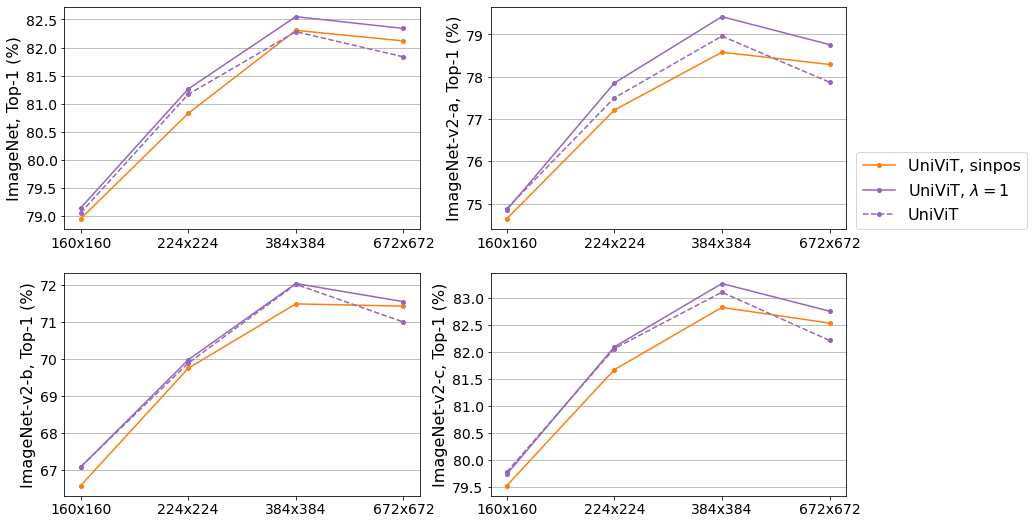

In [25]:
plt.figure(figsize=(14, 9))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', #'#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for index, name in zip(range(4), ["ImageNet", "ImageNet-v2-a", "ImageNet-v2-b", "ImageNet-v2-c"]):
    ax = plt.subplot(2, 2, index + 1)
    plt.grid(axis="y")
    for n, (data, l, col, kw) in enumerate(zip([sin2d_mix_128_320_base10, cape_no_scale_mix_128_320_base10, cape_mix_128_320_base10],
                       ["UniViT, sinpos", "UniViT, $\lambda=1$", "UniViT"],
                                     [1, 3, 3], ["", "", "--"])):
        plot_vit(ax, data, label=l, index=index, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{}, Top-1 (%)".format(name), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 1):
        plt.legend(fontsize=16, loc=(1.03, 0), ncol=1)
plt.savefig("vit_mix_ablation.png", dpi=300, bbox_inches="tight")

### mix sizes training

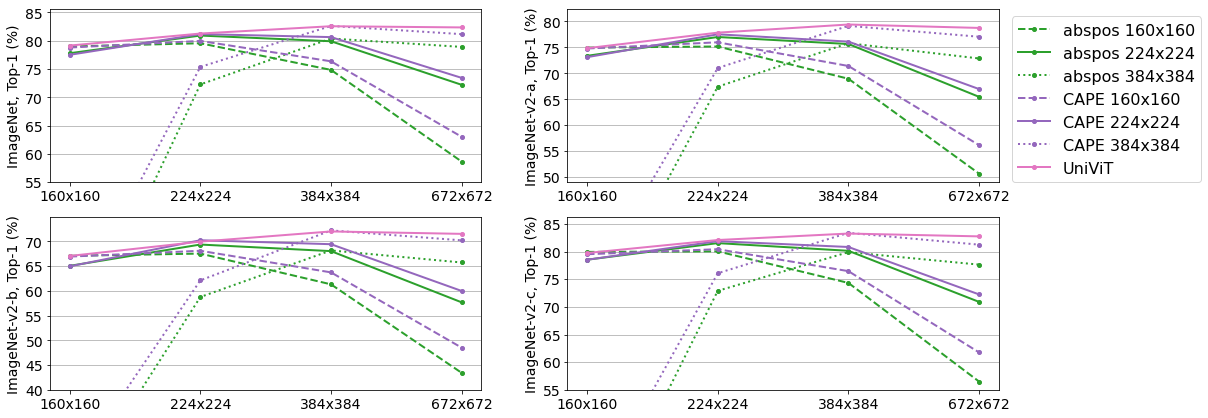

In [26]:
plt.figure(figsize=(17, 7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', #'#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for index, name in zip(range(4), ["ImageNet", "ImageNet-v2-a", "ImageNet-v2-b", "ImageNet-v2-c"]):
    ax = plt.subplot(2, 2, index + 1)
    plt.grid(axis="y")
    for n, (data, l, col, kw) in enumerate(zip([abspos_160, abspos, abspos_384, cape_160_base10, cape_base10, cape_384_base10, cape_no_scale_mix_128_320_base10, #cape_ft_base10
                                      ],
                       ["abspos 160x160", "abspos 224x224", "abspos 384x384", 
                        "CAPE 160x160", "CAPE 224x224", 
                        "CAPE 384x384", "UniViT", "CAPE 224x224 +ft 384x384"],
                        [2, 2, 2, 3, 3, 3, 5], ["--", "", ":", "--", "", ":", ""])):
        plot_vit(ax, data, label=l, index=index, color=colors[col], linewidth=2.5 if "mix" in l else 2, kw=kw)
    plt.ylabel("{}, Top-1 (%)".format(name), fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 0):
        plt.ylim(55,)
    elif (index == 1):
        plt.ylim(49,)
    elif (index == 2):
        plt.ylim(40,)
    else:
        plt.ylim(55,)
    if (index == 1):
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(
#             handles[0::3] + handles[1::3] + handles[2::3], 
#                    labels[0::3] + labels[1::3] +  labels[2::3], 
                   fontsize=16, loc=(1.03, 0), ncol=1)
plt.savefig("vit_size_best.png", dpi=300, bbox_inches="tight")

## small and tiny

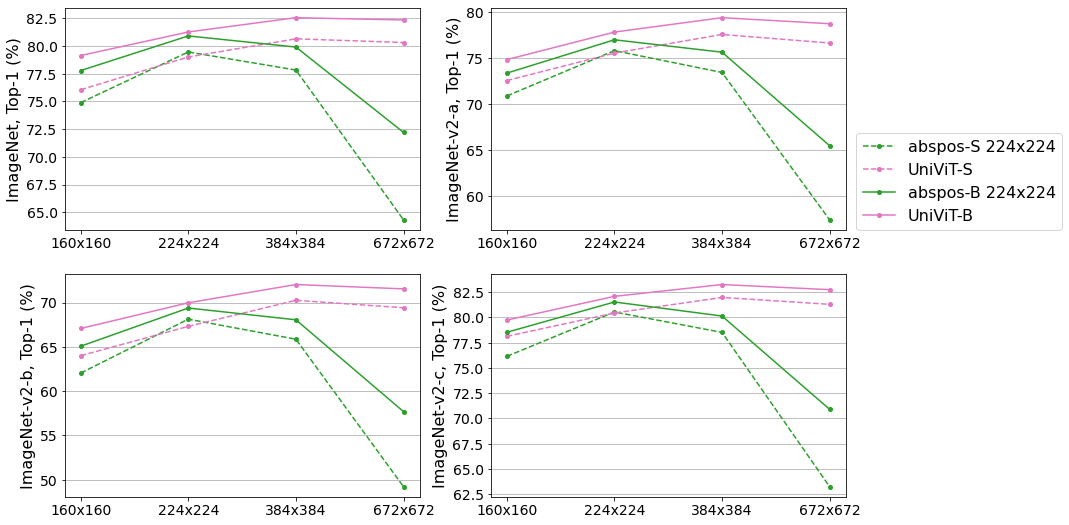

In [194]:
plt.figure(figsize=(14, 9))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for index, name in zip(range(4), ["ImageNet", "ImageNet-v2-a", "ImageNet-v2-b", "ImageNet-v2-c"]):
    ax = plt.subplot(2, 2, index + 1)
    plt.grid(axis="y")
    for n, (data, l, c, kw) in enumerate(zip([abspos_small, univit_small, abspos, cape_no_scale_mix_128_320_base10],
                       ["abspos-S 224x224", "UniViT-S", "abspos-B 224x224", "UniViT-B"], [2, 6, 2, 6], ["--", "--", "", ""])):
        plot_vit(ax, data, label=l, index=index, color=colors[c], kw=kw, linewidth=1.5)
    plt.ylabel("{}, Top-1 (%)".format(name), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 1):
        plt.legend(fontsize=16, loc=(1.03, 0), ncol=1)
plt.savefig("vit_tiny_small.png", dpi=300, bbox_inches="tight")

# Time 

In [27]:
acc_1 = "71.214	76.584	79.136	80.434	81.274	81.742	82.126	82.254	0	82.55"
acc_5 = "89.836	92.952	94.392	95.014	95.558	95.778	95.914	95.986	0	96.176"

In [28]:
def plot_speed(data, speed, speed_std, label, kw="", linewidth=2):
    points = [96, 128, 160, 192, 224, 256, 288, 320, 352, 384][:len(speed)]
    y = list(map(float, data.split("\t")))[:len(speed)]
#     plt.errorbar(speed, y, xerr=speed_std, marker='+', color="grey", fmt="none")
    plt.plot(speed, y, kw, linewidth=linewidth, label=label, marker="x", markersize=8)
    for i, txt in enumerate(points):
        tmp = -2.5 if i % 2 == 0 else 1
        plt.annotate(f"${txt}^2$", (speed[i], y[i] - 2), color="black", fontsize=11)

In [29]:
path = "/checkpoint/antares/experiments/fl_new_master/augposemb/vit/log/41750870.err"
res = !cat $path | grep "total time"
res = [50000 / float(r.split(": ")[-1]) for r in res]
numpy.mean(res)

1989.7040273816435

In [30]:
timing_mean = []
timing_std = []


paths = {
#     64: "41482795.err",
        96: "41483090.err",
        128: "41471967.err", 
         160: "41533252.err", 
         192: "41525425.err", 
        224: "41439642.err",
        256: "41545767.err"}

for name in [96, 128, 160, 192, 224, 256, 288, 320, 352, 384]:
    path = "/checkpoint/antares/experiments/fl_new_master/augposemb/vit/log/" + paths[name]
    res = !cat $path | grep "total time"
    res = [50000 / float(r.split(": ")[-1]) for r in res]
    print(name, len(res))
    timing_mean.append(numpy.mean(res))
    timing_std.append(numpy.std(res))

96 30
128 30
160 30
192 30
224 30
256 30


KeyError: 288

In [48]:
timing_mean

[1611.8035640218711,
 915.3504360315771,
 567.146284551149,
 396.4918700835526,
 287.3114962935185,
 207.07931091060664]

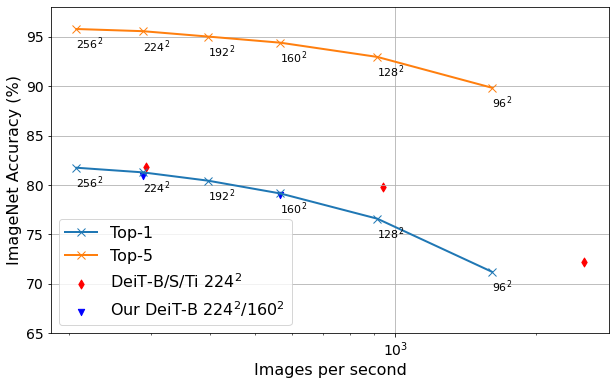

In [31]:
plt.figure(figsize=(10, 6))
plt.grid()
plot_speed(acc_1, timing_mean, timing_std, "Top-1")
plot_speed(acc_5, timing_mean, timing_std, "Top-5")
plt.xlabel("Images per second", fontsize=16)
plt.ylabel("ImageNet Accuracy (%)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.scatter([292.3, 940.4, 2536.5], [81.8, 79.8, 72.2], color="r", s=40, marker="d", label="DeiT-B/S/Ti $224^2$")
plt.scatter([287.3114962935185, 567.146284551149], [80.904, 78.97], color="b", s=40, marker="v", label="Our DeiT-B $224^2$/$160^2$")
# [85.9, 83.1, ] 1989.7040273816435
plt.xscale("log")
plt.legend(fontsize=16)# loc=(1.03, 0))
plt.ylim(65, 98)
plt.savefig("vit_speed.png", dpi=300, bbox_inches="tight")

In [163]:
def plot_speed_final(log, label, kw="", linewidth=2, put_down=False):
    acc = !cat $log | grep "1 acc" | cut -f 8 -d " "
    acc = list(map(float, acc))
    speed = !cat $log | grep "Througput" | cut -f 7 -d " "
    speed = list(map(float, speed))
    points = [96, 128, 160, 192, 224, 256, 288, 320, 352, 384][:len(speed)]
    shift = [100, 600, 100, 180, 100, 100, 50, 50, 50, 20]
    
    plt.plot(speed, acc[:len(speed)], kw, linewidth=linewidth, label=label, marker="x", markersize=8)
    print(speed[2], speed[4], speed[-1])
    for i in [0, 4, -1]:
        if put_down and i == -1:
            plt.annotate(f"${points[i]}^2$", (speed[i], acc[i] - 1.3), color="black", fontsize=9)
        else:
            plt.annotate(f"${points[i]}^2$", (speed[i], acc[i] + 0.2), color="black", fontsize=9)

1837.6 855.571 222.519
605.574 289.705 82.0821


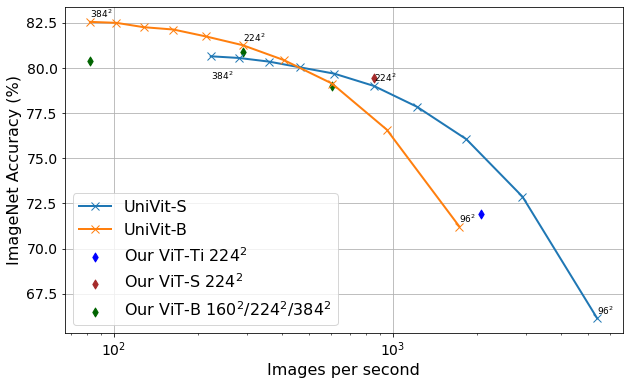

In [196]:
plt.figure(figsize=(10, 6))
plt.grid()
# plot_speed_final("/checkpoint/antares/experiments/fl_new_master/augposemb/vit/log/41863459.err",
#                  "UniVit-Ti")
plot_speed_final("/checkpoint/antares/experiments/fl_new_master/augposemb/vit/log/41863528.err",
                 "UniVit-S", put_down=True)
plot_speed_final("/checkpoint/antares/experiments/fl_new_master/augposemb/vit/log/41864912.err",
                 "UniVit-B")

plt.xlabel("Images per second", fontsize=16)
plt.ylabel("ImageNet Accuracy (%)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.scatter([292.3, 940.4, 2536.5], [81.8, 79.8, 72.2], color="r", s=40, marker="d", label="DeiT-B/S/Ti $224^2$")
plt.scatter([2074.88], [71.914], color="b", s=40, marker="d", label="Our ViT-Ti $224^2$")
plt.scatter([855.571], [79.456], color="brown", s=40, marker="d", label="Our ViT-S $224^2$")
plt.scatter([605.574, 289.705, 82.0821], [78.974, 80.904, 80.382], color="darkgreen", s=40, marker="d", label="Our ViT-B $160^2$/$224^2$/$384^2$")
plt.xscale("log")
plt.legend(fontsize=16)# loc=(1.03, 0))
# plt.ylim(65, 98)
plt.savefig("vit_speed_final.png", dpi=300, bbox_inches="tight")

## Table with all numbers

In [ ]:
for model, name in zip([univit_tiny, sin2d_160_base10, cape_no_scale_160_base10, cape_160_base10], 
                 ["abspos", "sinpos 2D", "CAPE 2D, $\lambda=0$", "CAPE 2D"]):
    print(name + " &  & " + " & ".join(list(map(lambda x: x.split("/")[0], model.split("\t")))) + " \\\\")

In [1148]:
for model, name in zip([abspos_160, sin2d_160_base10, cape_no_scale_160_base10, cape_160_base10], 
                 ["abspos", "sinpos 2D", "CAPE 2D, $\lambda=0$", "CAPE 2D"]):
    print(name + " &  & " + " & ".join(list(map(lambda x: x.split("/")[0], model.split("\t")))) + " \\\\")

abspos &  & 78.974 & 79.544 & 74.84 & 58.648 & 74.97 & 75.18 & 68.96 & 50.66 & 67.1 & 67.55 & 61.33 & 43.43 & 79.94 & 80.04 & 74.33 & 56.49 \\
sinpos 2D &  & 78.94  & 73.814  & 63.98  & 40.26  & 74.79  & 69.92  & 57.08  & 32.61  & 66.74  & 61.72  & 49.98  & 27.03  & 79.6  & 75.38  & 63.41  & 38.04  \\
CAPE 2D, $\lambda=0$ &  & 78.388  & 79.296  & 74.974  & 60.366  & 74.06  & 75.38  & 69.57  & 52.37  & 65.82  & 67.8  & 62.29  & 45.51  & 78.79  & 80.11  & 75.02  & 58.21  \\
CAPE 2D &  & 78.788  & 79.954  & 76.354  & 63.026  & 74.79  & 75.99  & 71.42  & 56.15  & 66.94  & 68.12  & 63.75  & 48.52  & 79.52  & 80.43  & 76.46  & 61.76  \\


In [1158]:
for model, name in zip([nopos, abspos, sin2d_base10, cape_no_scale_base10, cape_base10],
                 ["nopos", "abspos", "sinpos 2D", "CAPE 2D, $\lambda=0$", "CAPE 2D"]):
    print(name + " &  & " + " & ".join(list(map(lambda x: x.split("/")[0], model.split("\t")))) + " \\\\")

nopos &  & 75.194  & 79.11  & 78.954  & 72.28  & 70.98  & 75.18  & 74.16  & 66.18  & 62.38  & 67.82  & 67.01  & 58.77  & 76.33  & 79.72  & 78.51  &  71.08  \\
abspos &  & 77.782 & 80.904 & 79.898 & 72.206 & 73.38 & 77.01 & 75.66 & 65.47 & 65.07 & 69.38 & 68.05 & 57.69 & 78.53 & 81.53 & 80.14 & 70.9 \\
sinpos 2D &  & 77.68  & 81.39  & 79.84  & 70.69  & 73.29  & 77.97  & 75.51  & 63.54  & 65.06  & 70.46  & 67.76  & 55.45  & 78.58  & 82.19  & 79.77  & 69.45  \\
CAPE 2D, $\lambda=0$ &  & 77.236  & 80.758  & 80.34  & 72.682  & 73.07  & 77.57  & 76.08  & 66.09  & 65.08  & 69.86  & 69.16  & 58.55  & 78.19  & 82.01  & 80.68  & 71.92  \\
CAPE 2D &  & 77.5  & 81.16  & 80.63  & 73.43  & 73.12  & 77.53  & 76.12  & 66.97  & 64.97  & 70.25  & 69.45  & 59.99  & 78.52  & 81.88  & 80.83  & 72.25  \\


In [1150]:
for model, name in zip([abspos_384, sin2d_384_base10, cape_no_scale_384_base10, cape_384_base10],
                 ["abspos", "sinpos 2D", "CAPE 2D, $\lambda=0$", "CAPE 2D"]):
    print(name + " &  & " + " & ".join(list(map(lambda x: x.split("/")[0], model.split("\t")))) + " \\\\")

abspos &  & 23.732 & 72.274 & 80.382 & 78.898 & 20.7 & 67.43 & 75.81 & 72.87 & 17.35 & 58.77 & 68.19 & 65.75 & 25.52 & 72.9 & 79.9 & 77.64 \\
sinpos 2D &  & 9.184  & 74.712  & 82.366  & 80.678  & 8.25  & 70.04  & 78.97  & 75.95  & 6.45  & 61.29  & 71.52  & 68.64  & 10.15  & 75.19  & 82.99  & 80.02  \\
CAPE 2D, $\lambda=0$ &  & 32.306  & 75.642  & 82.344  & 80.742  & 28.96  & 70.78  & 78.81  & 76.67  & 23.45  & 62.3  & 71.47  & 69.37  & 34.14  & 76.21  & 82.83  & 80.87  \\
CAPE 2D &  & 31.53  & 75.368  & 82.6  & 81.152  & 27.9  & 71.03  & 79.16  & 77.06  & 23.18  & 62.13  & 72.24  & 70.23  & 33.49  & 76.08  & 83.39  & 81.25  \\


In [1156]:
for model, name in zip([nopos_ft, abspos_ft, sin2d_ft_base10, cape_no_scale_ft_base10, cape_ft_base10],
                 ["nopos", "abspos", "sinpos 2D", "CAPE 2D, $\lambda=0$", "CAPE 2D"]):
    print(name + ", ft &  & " + " & ".join(list(map(lambda x: x.split("/")[0], model.split("\t")))) + " \\\\")

nopos, ft &  & 35.964  & 75.62  & 80.77  & 79.32  & 32.37  & 71.52  & 77.16  & 74.63  & 26.03  & 63.24  & 69.61  & 67.45  & 37.93  & 76.44  & 81.06  & 78.8  \\
abspos, ft &  & 34.164 & 78.51 & 82.346 & 80.632 & 29.71 & 75.02 & 79.1 & 76.1 & 24.45 & 66.54 & 71.91 & 68.79 & 35.76 & 79.33 & 83.15 & 80.63 \\
sinpos 2D, ft &  & 29.708  & 78.40  & 82.894  & 80.992  & 25.92  & 74.45  & 79.48  & 76.24  & 20.86  & 66.55  & 72.52  & 69.41  & 30.82  & 79.59  & 83.74  & 80.78  \\
CAPE 2D, $\lambda=0$, ft &  & 55.766  & 78.168  & 82.39  & 80.972  & 51.37  & 75  & 79.32  & 76.4  & 42.94  & 66.7  & 71.92  & 69.55  & 58.21  & 79.57  & 83.12  & 81.07  \\
CAPE 2D, ft &  & 57.908  & 78.386  & 82.786  & 81.048  & 52.81  & 74.79  & 79.33  & 76.7  & 44.48  & 66.74  & 72.43  & 70.19  & 59.61  & 79.54  & 83.51  & 81.2  \\


In [1152]:
for model, name in zip([sin2d_mix_128_320_base10, cape_no_scale_mix_128_320_base10, cape_mix_128_320_base10],
                 ["sinpos 2D", "CAPE 2D, $\lambda=0$", "CAPE 2D"]):
    print(name + ", ft & mix & " + " & ".join(list(map(lambda x: x.split("/")[0], model.split("\t")))) + " \\\\")
    


sinpos 2D, ft & mix & 78.944  & 80.824  & 82.306  & 82.118  & 74.64  & 77.21  & 78.58  & 78.29  & 66.57  & 69.74  & 71.48  & 71.42  & 79.53  & 81.67  & 82.82  & 82.53  \\
CAPE 2D, $\lambda=0$, ft & mix & 79.136  & 81.26  & 82.55  & 82.34  & 74.85  & 77.85  & 79.42  & 78.76  & 67.07  & 69.97  & 72.03  & 71.54  & 79.74  & 82.09  & 83.26  & 82.75  \\
CAPE 2D, ft & mix & 79.05  & 81.164  & 82.282  & 81.834  & 74.88  & 77.5  & 78.96  & 77.87  & 67.08  & 69.88  & 72.01  & 70.99  & 79.78  & 82.06  & 83.1  & 82.21  \\


In [1157]:
for model, name in zip([abspos_160, sin2d_160_base10, cape_no_scale_160_base10, cape_160_base10], 
                 ["abspos", "sinpos 2D", "CAPE 2D, $\lambda=0$", "CAPE 2D"]):
    print(name + " &  & " + " & ".join(list(map(lambda x: x.split("/")[1], model.split("\t")))) + " \\\\")
for model, name in zip([nopos, abspos, sin2d_base10, cape_no_scale_base10, cape_base10],
                 ["nopos", "abspos", "sinpos 2D", "CAPE 2D, $\lambda=0$", "CAPE 2D"]):
    print(name + " &  & " + " & ".join(list(map(lambda x: x.split("/")[1], model.split("\t")))) + " \\\\")
for model, name in zip([abspos_384, sin2d_384_base10, cape_no_scale_384_base10, cape_384_base10],
                 ["abspos", "sinpos 2D", "CAPE 2D, $\lambda=0$", "CAPE 2D"]):
    print(name + " &  & " + " & ".join(list(map(lambda x: x.split("/")[1], model.split("\t")))) + " \\\\")
for model, name in zip([nopos_ft, abspos_ft, sin2d_ft_base10, cape_no_scale_ft_base10, cape_ft_base10],
                 ["nopos", "abspos", "sinpos 2D", "CAPE 2D, $\lambda=0$", "CAPE 2D"]):
    print(name + ", ft & 384 & " + " & ".join(list(map(lambda x: x.split("/")[1], model.split("\t")))) + " \\\\")
for model, name in zip([sin2d_mix_128_320_base10, cape_no_scale_mix_128_320_base10, cape_mix_128_320_base10],
                 ["sinpos 2D", "CAPE 2D, $\lambda=0$", "CAPE 2D"]):
    print(name + ", ft & mix & " + " & ".join(list(map(lambda x: x.split("/")[1], model.split("\t")))) + " \\\\")
    


abspos &  & 94.298 & 94.63 & 92.262 & 82.03 & 92.98 & 93.27 & 89.53 & 76.02 & 86.53 & 87.11 & 83.32 & 68.34 & 95.32 & 95.47 & 92.88 & 80.99 \\
sinpos 2D &  & 94.25 &  91.594 &  85.15 &  64.514 &  92.73 &  90.09 &  81.13 &  56.97 &  86.52 &  82.9 &  73.82 &  49.77 &  95.36 &  93.06 &  85.66 &  62.84 \\
CAPE 2D, $\lambda=0$ &  &  93.886 &  94.438 &  92.466 &  83.706 &  92.65 &  93.08 &  90.16 &  77.82 &  86.27 &  87.05 &  83.79 &  70.75 &  95.29 &  95.64 &  93.16 &  83.12 \\
CAPE 2D &  &  94.056 &  94.878 &  93.088 &  85.374 &  93.02 & 93.55 &  91.47 &  80.92 &  86.29 &  87.81 &  85.16 &  73.37 &  95.28 &  95.87 &  94.43 &  85.36 \\
nopos &  &  92.154 &  94.372 &  94.234 &  90.72 ? &  90.31 &  93.12 &  92.54 &  87.79 &  82.98 &  86.84 &  87.29 &  81.68 &  93.44 &  95.37 &  94.87 &  91.07 \\
abspos &  & 93.446 & 95.26 & 94.714 & 90.488 & 91.8 & 93.91 & 93.24 & 87.13 & 85.34 & 88.52 & 87.77 & 80.23 & 94.52 & 96.17 & 95.43 & 90.76 \\
sinpos 2D &  &  93.38 &  95.506 &  94.52 &  89.542 &  92.

In [278]:
for model, name in zip([abspos_tiny, abspos_small, univit_tiny, univit_small], 
                 ["abspos-Ti", "abspos-S", "UniViT-Ti, $\lambda=1$", "UniViT-S, $\lambda=1$"]):
    print(name + " & & " + " & ".join(list(map(lambda x: x.split("/")[0], model.split("\t")))) + " \\\\")

abspos-Ti & & 64.758 & 71.914 & 70.208 & 56.122 & 61.03 & 68.78 & 66.3 & 49.62 & 51.88 & 59.67 & 58.09 & 42.71 & 67.97 & 74.13 & 71.92 & 55.63 \\
abspos-S & & 74.888 & 79.456 & 77.828 & 64.318 & 70.89 & 75.83 & 73.45 & 57.4 & 62.04 & 68.12 & 65.86 & 49.22 & 76.15 & 80.54 & 78.52 & 63.24 \\
UniViT-Ti, $\lambda=1$ & & 65.246 & 69.826 & 72.438 & 71.152 & 62.2 & 66.4 & 68.99 & 67.45 & 53.35 & 57.25 & 61.3 & 59.72 & 69.15 & 72.64 & 74.93 & 73.23 \\
UniViT-S, $\lambda=1$ & & 76.05 & 79.004 & 80.644 & 80.308 & 72.57 & 75.56 & 77.59 & 76.66 & 64 & 67.31 & 70.25 & 69.41 & 78.13 & 80.44 & 81.98 & 81.3 \\


In [277]:
for model, name in zip([abspos_tiny, abspos_small, univit_tiny, univit_small], 
                 ["abspos-Ti", "abspos-S", "UniViT-Ti, $\lambda=1$", "UniViT-S, $\lambda=1$"]):
    print(name + " & & " + " & ".join(list(map(lambda x: x.split("/")[1], model.split("\t")))) + " \\\\")

abspos-Ti & & 86.538 & 90.928 & 90.156 & 80.804 & 85.59 & 90.13 & 88.48 & 76.1 & 76.5 & 82.39 & 81.41 & 68.03 & 89.74 & 93.25 & 91.81 & 81 \\
abspos-S & & 92.126 & 94.692 & 94.094 & 85.75 & 90.78 & 93.74 & 92.97 & 81.28 & 83.44 & 87.62 & 86.72 & 73.72 & 93.82 & 95.95 & 95.3 & 85.73 \\
UniViT-Ti, $\lambda=1$ & & 86.942 & 89.738 & 91.332 & 90.798 & 86.03 & 88.79 & 90.35 & 89.25 & 77.33 & 80.97 & 83.42 & 82.41 & 90.17 & 92.31 & 93.44 & 92.37 \\
UniViT-S, $\lambda=1$ & & 92.982 & 94.642 & 95.526 & 95.346 & 92.08 & 93.98 & 95.03 & 94.65 & 85.15 & 87.92 & 89.64 & 89.02 & 94.88 & 96 & 96.72 & 96.37 \\


In [364]:
for model, name in zip([cape_no_scale_no_global, cape_no_scale_no_local, cape_no_global, cape_no_local], 
                 ["CAPE, $\lambda=1, \Delta=0$", 
                 "CAPE, $\lambda=1, \epsilon=0$",
                 "CAPE, $\Delta=0$",
                 "CAPE, $\epsilon=0$"]):
    print(name + " & & " + " & ".join(list(map(lambda x: x.split("/")[0], model.split("\t")))) + " \\\\")

CAPE, $\lambda=1, \Delta=0$ & & 77.532 & 81.084 & 80.18 & 72.344 & 73.41 & 77.61 & 75.81 & 65.99 & 64.85 & 70.23 & 68.22 & 57.83 & 78.33 & 82.05 & 80.06 & 70.99 \\
CAPE, $\lambda=1, \epsilon=0$ & & 77.458 & 81.144 & 80.488 & 72.132 & 73.35 & 77.9 & 76.36 & 64.95 & 64.84 & 69.84 & 68.45 & 57.31 & 78.8 & 81.84 & 80.58 & 70.53 \\
CAPE, $\Delta=0$ & & 77.35 & 81.08 & 80.502 & 73.108 & 73.05 & 77.59 & 76.73 & 67.25 & 64.98 & 69.75 & 69.14 & 59.01 & 78.32 & 81.88 & 81 & 72.04 \\
CAPE, $\epsilon=0$ & & 77.706 & 81.296 & 80.572 & 73.354 & 73.51 & 77.71 & 76.72 & 66.58 & 65.01 & 69.93 & 69.59 & 59.31 & 78.02 & 81.93 & 80.86 & 71.73 \\


In [365]:
for model, name in zip([cape_no_scale_no_global, cape_no_scale_no_local, cape_no_global, cape_no_local], 
                 ["CAPE, $\lambda=1, \Delta=0$", 
                 "CAPE, $\lambda=1, \epsilon=0$",
                 "CAPE, $\Delta=0$",
                 "CAPE, $\epsilon=0$"]):
    print(name + " & & " + " & ".join(list(map(lambda x: x.split("/")[1], model.split("\t")))) + " \\\\")

CAPE, $\lambda=1, \Delta=0$ & & 93.294 & 95.212 & 94.73 & 90.558 & 91.47 & 93.73 & 92.91 & 87.42 & 84.8 & 88.26 & 87.69 & 80.74 & 94.43 & 96.14 & 95.37 & 90.6 \\
CAPE, $\lambda=1, \epsilon=0$ & & 93.372 & 95.416 & 94.966 & 90.722 & 91.46 & 94.29 & 93.26 & 86.82 & 85.26 & 88.87 & 88.15 & 80.26 & 94.47 & 96.22 & 95.61 & 90.34 \\
CAPE, $\Delta=0$ & & 93.19 & 95.42 & 94.998 & 91.304 & 91.94 & 94.38 & 93.75 & 88.13 & 85.13 & 88.97 & 88.52 & 82.01 & 94.63 & 96.27 & 96.01 & 91.4 \\
CAPE, $\epsilon=0$ & & 93.256 & 95.318 & 94.942 & 91.246 & 91.92 & 94.24 & 93.63 & 87.8 & 84.88 & 88.64 & 88.26 & 81.1 & 94.65 & 96.18 & 95.51 & 90.99 \\


In [354]:
prefix = "/checkpoint/wav2letter/transfer_learning/aws/icassp_paper/ams/sclite/log/"
models_nopad = []
for log in ["41750893.err", "41750894.err", "41750895.err", "41754479.err", "41750897.err", "41750898.err", "41840063.err"]:
    path = prefix + log
    res = !cat $path | grep decoding | cut -f5 -d ":" | cut -f 1 -d "%"
    res = list(map(float, res))
    res = res[16:19] + [res[25]] + res[19:21] + [res[26]] + res[8:12] + [res[23]] + res[12:16] + [res[24]] + [0] * 10 + res[0:4] + [res[21]] + res[4:8] + [res[22]]
    models_nopad.append("\t".join(list(map(str, res))))
    print(models_nopad[-1])

13.8575	12.6737	12.2995	13.4807	11.738	11.7123	11.7313	41.6281	40.4454	54.1745	80.1414	50.537	42.2368	39.4461	49.2798	73.1449	42.5091	0	0	0	0	0	0	0	0	0	0	31.6137	28.72	32.2029	61.3836	34.0916	53.9316	51.4079	57.4751	77.6298	55.1592
13.6636	13.3053	11.7647	13.5171	11.4272	11.5753	11.4655	41.6975	39.9639	48.2302	70.7584	47.4948	42.8102	39.1536	42.5412	65.96	41.96	0	0	0	0	0	0	0	0	0	0	31.7059	28.88	29.8693	48.298	32.5339	53.4112	50.8541	55.8061	67.9427	53.9824
13.2757	12.8421	11.7647	13.1163	11.0447	10.6164	10.9339	40.4487	38.384	42.3939	41.1954	40.2126	40.5474	36.6764	36.7284	35.689	38.4909	0	0	0	0	0	0	0	0	0	0	30.4322	27.592	27.1624	27.3609	29.038	51.9106	48.5545	52.8764	48.6684	51.1453
13.0994	13.2632	10.6952	13.0921	10.8295	10.8219	10.8276	39.8936	38.4291	42.529	42.3522	40.325	40.8302	37.5452	38.1173	35.689	39.0909	0	0	0	0	0	0	0	0	0	0	30.6521	27.944	27.4736	28.0015	29.3442	51.7956	49.3617	53.2138	51.3981	51.43
14.0339	13.1789	14.4385	13.7965	11.3555	11.5753	11.4124	39.9861	39.7382	42.47

In [355]:
prefix = "/checkpoint/wav2letter/transfer_learning/aws/icassp_paper/ams/sclite/log/"
models_nopad_tl = []
for log in ["42048945.err", "42048681.err"]:
    path = prefix + log
    res = !cat $path | grep decoding | cut -f5 -d ":" | cut -f 1 -d "%"
    res = list(map(float, res))
    res = res[16:19] + [res[25]] + res[19:21] + [res[26]] + res[8:12] + [res[23]] + res[12:16] + [res[24]] + [0] * 10 + res[0:4] + [res[21]] + res[4:8] + [res[22]]
    models_nopad_tl.append("\t".join(list(map(str, res))))
    print(models_nopad_tl[-1])

11.6185	12.3368	17.1123	11.9504	9.80158	10.5479	9.99468	7.23867	7.08697	10.6728	24.2288	10.8699	8.59262	6.31344	9.67078	17.9034	7.99273	0	0	0	0	0	0	0	0	0	0	10.4031	8.752	13.799	30.7467	12.5399	21.2295	18.0402	25.0533	44.6738	22.3373
11.354	11.6211	13.369	11.4768	9.1083	9.72603	9.26812	7.12303	6.36473	6.99811	8.77249	7.10229	8.18745	5.80595	6.893	5.7715	7.01455	0	0	0	0	0	0	0	0	0	0	9.90633	8.24	7.9496	8.62006	9.13725	21.0208	17.4958	18.3061	18.1425	19.846


In [356]:
prefix = "/checkpoint/wav2letter/transfer_learning/aws/icassp_paper/ams/sclite/log/"
models_ablation = []
# nopos dp01 and nolocal 2000 wsj
for log in ["42099814.err", "42099830.err"]:
    path = prefix + log
    res = !cat $path | grep decoding | cut -f5 -d ":" | cut -f 1 -d "%"
    res = list(map(float, res))
    res = res[16:19] + [res[25]] + res[19:21] + [res[26]] + res[8:12] + [res[23]] + res[12:16] + [res[24]] + [0] * 10 + res[0:4] + [res[21]] + res[4:8] + [res[22]]
    models_ablation.append("\t".join(list(map(str, res))))
    print(models_ablation[-1])

20.5748	17.9789	14.4385	19.6867	16.2802	14.863	15.9135	49.2599	45.1399	49.311	49.5501	47.7816	49.6675	44.4435	43.2099	39.3404	46.6836	0	0	0	0	0	0	0	0	0	0	39.9624	34.736	33.1363	33.8214	37.247	60.9143	55.3501	56.4098	53.9947	58.8999
13.0465	11.9579	13.9037	12.752	11.1881	10.7534	11.0757	41.05	39.1965	42.9614	41.6452	40.8592	41.2124	37.0377	38.2716	37.5736	39.1273	0	0	0	0	0	0	0	0	0	0	31.0495	28.192	26.8357	27.6171	29.4983	52.3493	49.6621	52.5036	50.4993	51.7127


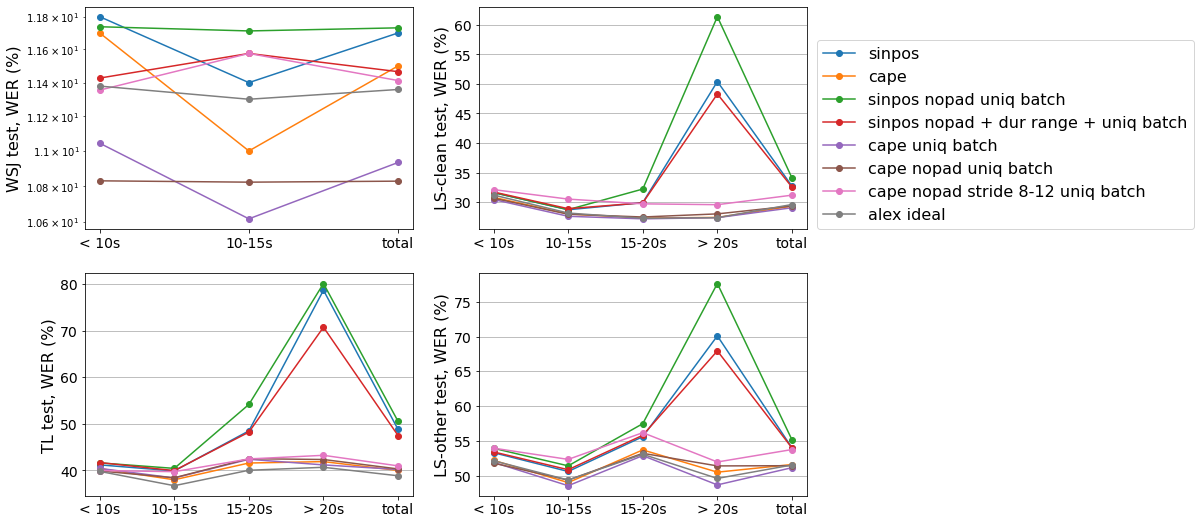

In [34]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(20, 9))
for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw in zip([wsj_sinpos, wsj_cape] + models_nopad,
                              [0, 1, 2, 3, 4, 5, 6, 7], [""] * 8):
        plot_eval(data, name, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if index == 1:
        plt.yscale("log")
    if (index == 2):
        plt.legend(["sinpos", "cape", "sinpos nopad uniq batch", "sinpos nopad + dur range + uniq batch",
                    "cape uniq batch", "cape nopad uniq batch", "cape nopad stride 8-12 uniq batch", 
                    "alex ideal"], fontsize=16, loc=(1.03, 0), ncol=1)

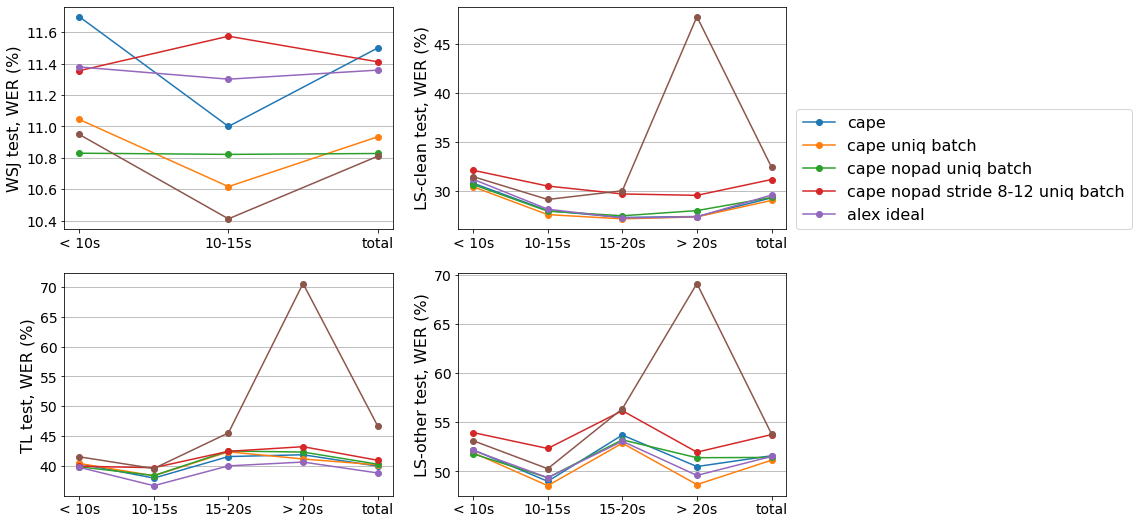

In [35]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(20, 9))
for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw in zip([wsj_cape] + models_nopad[2:],
                              [0, 1, 2, 3, 4, 5, 6, 7], [""] * 8):
        plot_eval(data, name, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
#     if index == 1:
#         plt.yscale("log")
    if (index == 2):
        plt.legend(["cape", 
                    "cape uniq batch", "cape nopad uniq batch", "cape nopad stride 8-12 uniq batch", 
                    "alex ideal"], fontsize=16, loc=(1.03, 0), ncol=1)

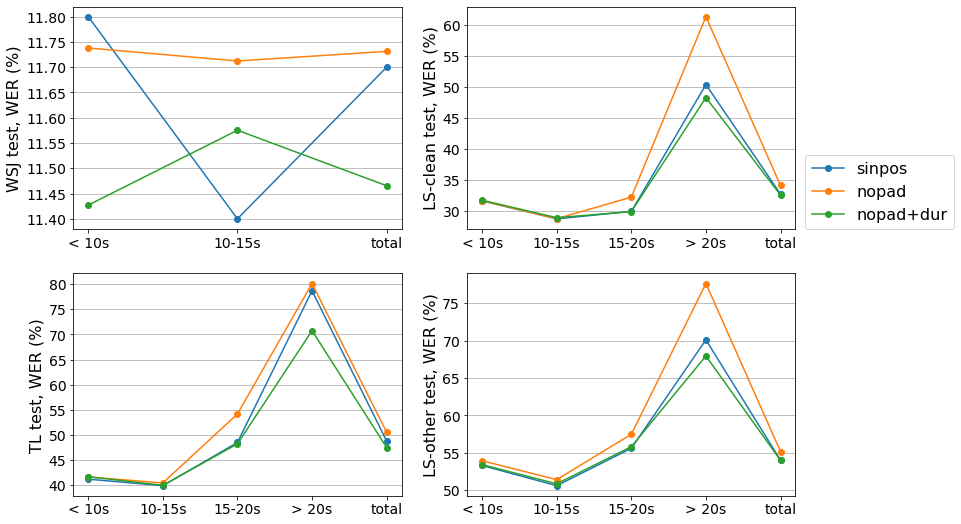

In [36]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(20, 9))
for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw in zip([wsj_sinpos] + models_nopad[:2],
                              [0, 1, 2, 3, 4, 5, 6, 7], [""] * 8):
        plot_eval(data, name, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
#     if index == 1:
#         plt.yscale("log")
    if (index == 2):
        plt.legend(["sinpos", "nopad", "nopad+dur"], fontsize=16, loc=(1.03, 0), ncol=1)

In [360]:
wsj_sinpos_nopad_prod = """None None None 85.6 89.6 92.2 None 94.4 
65.9 66.5 69.8 77.5 83.8 87.6 89.5 91.4 
72.6 73.3 76.3 81.9 86.7 89.0 90.3 91.5 
None 80.3 81.6 85.4 89.3 None 93.8 95.3 
81.7 80.6 82.1 85.8 89.5 91.8 93.5 94.5"""

wsj_cape_nopad_prod = """None None None 77.3 77.2 78.6 None 79.6 
64.7 64.8 65.5 65.5 65.5 66.9 67.0 68.1 
71.4 71.4 72.1 71.9 71.9 72.8 73.1 73.8 
None 78.5 78.2 77.7 77.8 None 78.9 80.1 
79.8 78.9 78.9 78.6 78.5 79.1 79.5 80.5 """

wsj_sinpos_nopad_prod_alex = """None None None 85.8 90.1 92.9 None 94.9 
64.8 65.8 69.5 77.8 84.7 88.6 90.6 92.7 
71.5 72.7 75.9 82.1 87.1 89.7 91.0 92.2 
None 79.6 81.1 85.3 89.6 None 94.6 96.0 
80.5 79.9 81.6 85.8 89.9 92.5 94.1 95.2"""

tl_sinpos_nopad_prod = """None None None 56.5 64.3 72.0 None 78.4 
24.2 23.6 29.3 40.2 51.7 61.1 66.5 71.5 
31.8 31.1 36.6 46.0 56.8 62.7 66.6 70.7 
None 42.6 47.5 56.6 65.9 None 78.4 82.4 
44.5 43.6 48.1 57.5 65.9 72.5 76.6 80.0"""

tl_cape_nopad_prod = """None None None 42.1 41.9 44.4 None 43.7 
23.7 23.0 23.2 23.1 23.3 24.8 23.7 23.9 
31.7 30.8 31.1 30.9 31.0 32.4 31.5 31.8 
None 42.5 42.3 42.3 42.3 None 42.7 43.5 
45.0 43.7 43.5 43.6 43.8 44.5 44.0 44.6"""

wsj_nopos_dp01_prod = """82.4 81.4 81.0 81.2 81.2 82.5 81.7 82.4 
71.5 70.7 70.8 71.1 71.2 72.1 72.0 72.2 
76.9 76.2 76.4 76.4 76.7 77.3 77.2 77.5 
83.3 82.1 81.7 81.9 81.9 82.3 82.4 82.7 
83.8 82.4 82.1 82.2 82.4 82.8 82.7 83.0"""

wsj_cape_no_scale_no_local_prod = """78.7 78.2 78.1 77.9 77.5 78.8 78.6 79.7 
65.0 65.5 66.0 65.7 65.9 67.3 67.6 68.6 
71.8 72.3 72.8 72.2 72.3 73.2 73.4 74.1 
79.5 78.7 78.6 77.7 77.8 78.3 78.7 79.8 
80.0 79.3 79.3 78.6 78.8 79.3 79.6 80.5"""

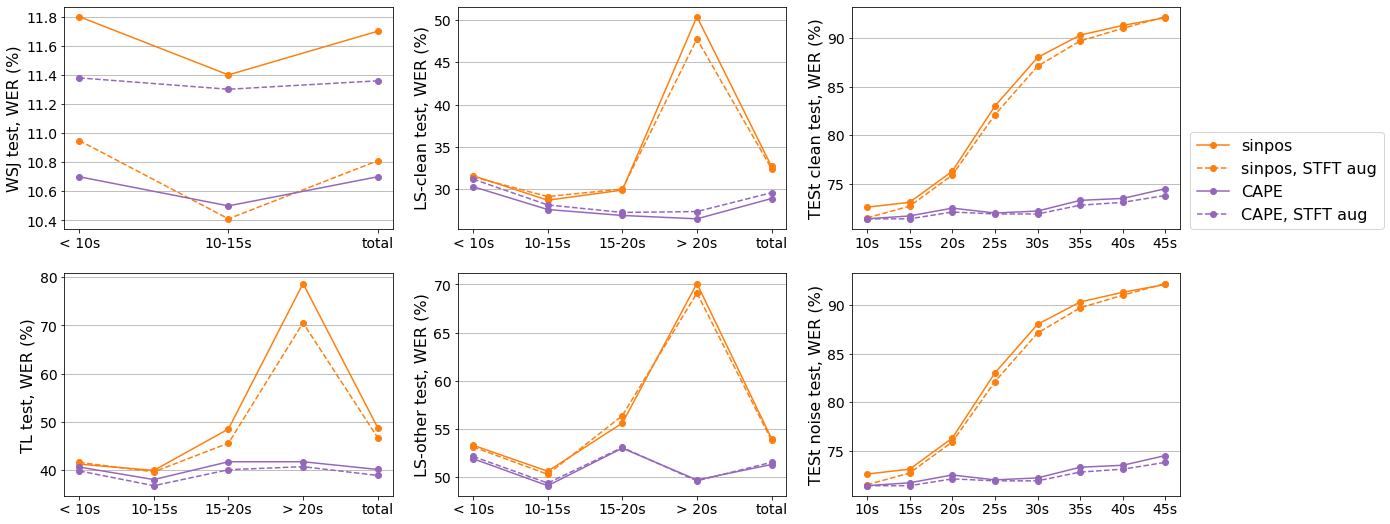

In [38]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(20, 9))
for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw in zip([wsj_sinpos] + [models_nopad[-1]] + [wsj_cape_no_scale] + [models_nopad[-2]],
                              [1, 1, 4, 4], ["", "--", "", "--"]):
        plot_eval(data, name, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
for index, name in zip([3, 6], ["test clean", "test noise"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw in zip([wsj_sinpos_prod, wsj_sinpos_nopad_prod_alex, wsj_cape_no_scale_prod, wsj_cape_nopad_prod],
                              [1, 1, 4, 4], ["", "--", "", "--"]):
        plot_prod(data, index2, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 3):
        plt.legend(["sinpos", "sinpos, STFT aug", "CAPE", "CAPE, STFT aug"], fontsize=16, loc=(1.03, 0), ncol=1)
plt.savefig("wsj_hop.png", dpi=300, bbox_inches="tight")

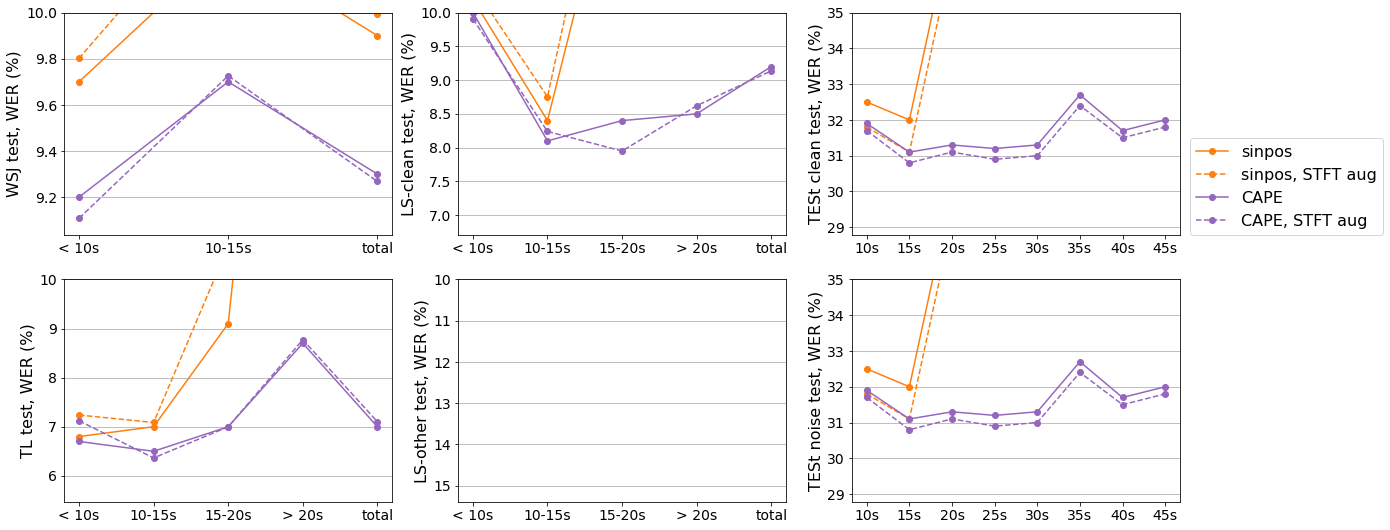

In [374]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(20, 9))
for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw in zip([tl_sinpos] + [models_nopad_tl[0]] + [tl_cape_no_scale] + [models_nopad_tl[1]],
                              [1, 1, 4, 4], ["", "--", "", "--"]):
        plot_eval(data, name, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylim(plt.ylim()[0], 10)
for index, name in zip([3, 6], ["test clean", "test noise"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y") # 
    for data, col, kw in zip([tl_sinpos_prod, tl_sinpos_nopad_prod,  tl_cape_no_scale_prod, tl_cape_nopad_prod],
                              [1, 1, 4, 4], ["", "--", "", "--"]):
        plot_prod(data, index2, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 3):
        plt.legend(["sinpos", "sinpos, STFT aug", "CAPE", "CAPE, STFT aug"], fontsize=16, loc=(1.03, 0), ncol=1)
    plt.ylim(plt.ylim()[0], 35)
plt.savefig("tl_hop.png", dpi=300, bbox_inches="tight")

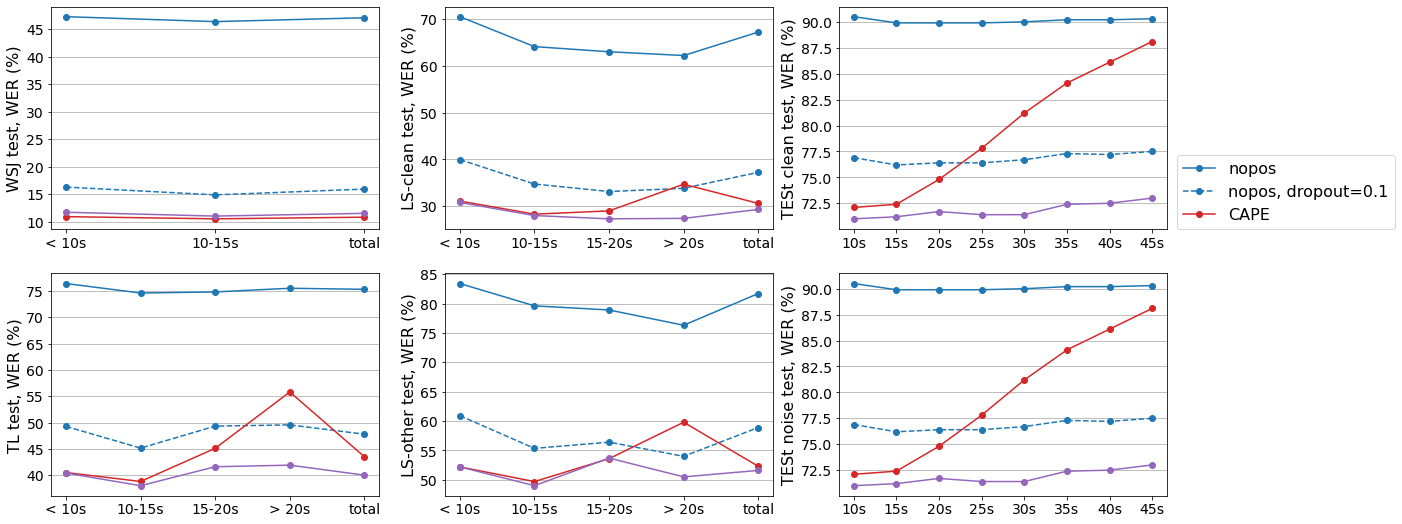

In [353]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(20, 9))
for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw in zip([wsj_nopos, models_ablation[0], wsj_relpos_200, wsj_cape],
                              [0, 0, 3, 4, 4], ["", "--", "", "", "--"]):
        plot_eval(data, name, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
for index, name in zip([3, 6], ["test clean", "test noise"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y") # 
    for data, col, kw in zip([wsj_nopos_prod, wsj_nopos_dp01_prod, wsj_relpos_200_prod, wsj_cape_prod],
                              [0, 0, 3, 4, 4], ["", "--", "", "", "--"]):
        plot_prod(data, index2, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 3):
        plt.legend(["nopos", "nopos, dropout=0.1", "CAPE"], fontsize=16, loc=(1.03, 0), ncol=1)
#     plt.ylim(plt.ylim()[0], 60)
plt.savefig("wsj_nopos.png", dpi=300, bbox_inches="tight")

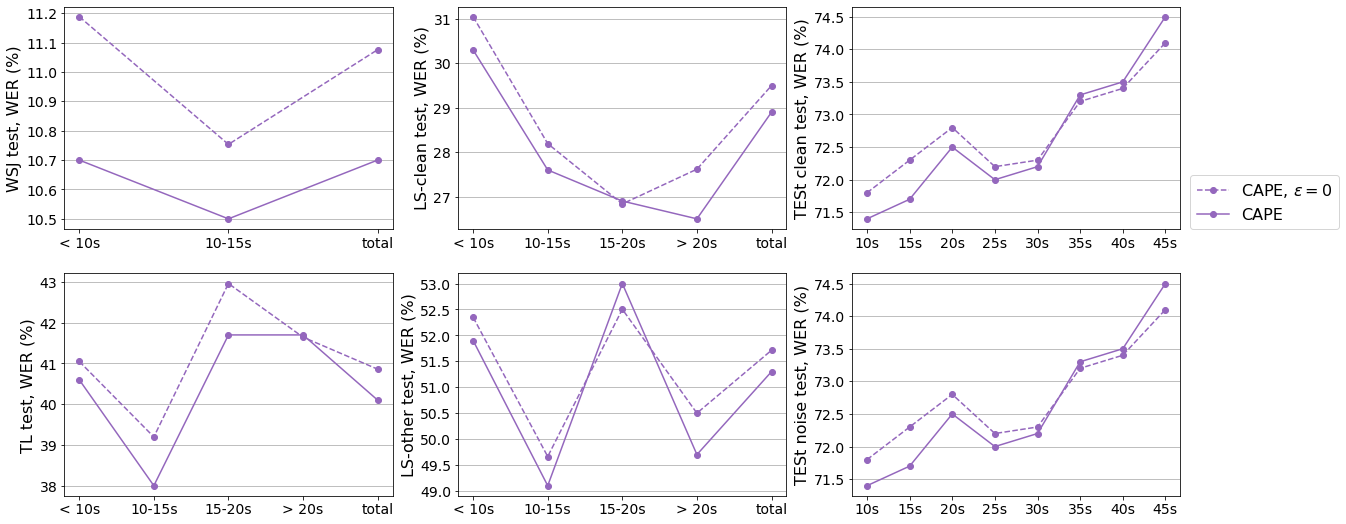

In [378]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(20, 9))
for index, name in zip([1, 4, 2, 5], ["wsj", "tl", "ls-clean", "ls-other"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y")
    for data, col, kw in zip([models_ablation[1], wsj_cape_no_scale, wsj_cape, ],
                              [4, 4, 4, 4], ["--", ""]):
        plot_eval(data, name, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
for index, name in zip([3, 6], ["test clean", "test noise"]):
    plt.subplot(2, 3, index)
    plt.grid(axis="y") # 
    for data, col, kw in zip([wsj_cape_no_scale_no_local_prod, wsj_cape_no_scale_prod, wsj_cape_prod],
                              [4, 4, 4, 4], ["--", ""]):
        plot_prod(data, index2, label=l, color=colors[col], kw=kw, linewidth=1.5)
    plt.ylabel("{} test, WER (%)".format(name[:3].upper() + name[3:]), fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if (index == 3):
        plt.legend(["CAPE, $\epsilon=0$", "CAPE", "CAPE with scale"], fontsize=16, loc=(1.03, 0), ncol=1)
#     plt.ylim(plt.ylim()[0], 60)
plt.savefig("wsj_local.png", dpi=300, bbox_inches="tight")

## Embedding visualization

In [480]:
n_col = 20

10 39
14 39
24 39


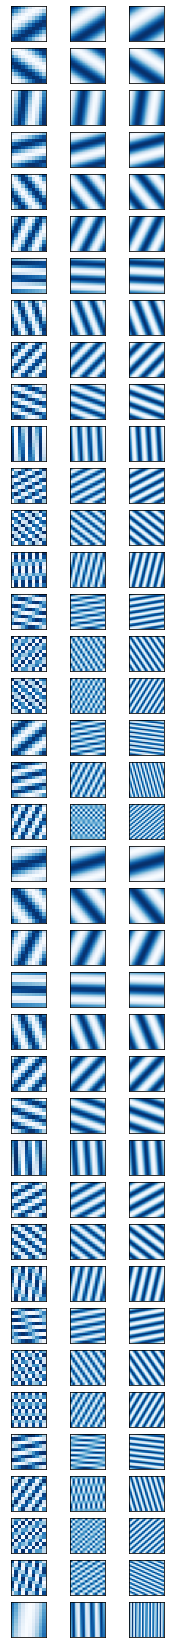

In [491]:
plt.figure(figsize=(3, 30))
for l, name in enumerate(["160", "224", "384"]):
    res = []
    emb_line = False
    with open("/checkpoint/antares/experiments/fl_new_master/augposemb/vit/visualize_emb_sin_cape_224_" + name, "r") as f:
        for line in f:
            if "emb" in line:
                emb_line = True
                continue
            if emb_line and "emb" not in line and "[" not in line and line != "\n":
                tmp = line.strip().split(" ")
                tmp = [k for k in tmp if k != ""]
                res.append(numpy.array(list(map(float, tmp))))

    sinpos_emb = res[:len(res) // 2]
    sinpos_emb = numpy.array(sinpos_emb)[:, 1:]
    k = l + 1
    img_size = int(numpy.sqrt(sinpos_emb.shape[1]))
    n = sinpos_emb.shape[0] // n_col + 1
    print(img_size, n)
    for i in range(sinpos_emb.shape[0])[::n_col]:
        plt.subplot(n, 3, k)
        plt.imshow(sinpos_emb[i, :].reshape(img_size, img_size), cmap="Blues", vmin=-1, vmax=1)
        plt.xticks([])
        plt.yticks([])
        k += 3
plt.savefig("vit_sinpos_emb_visualization.png", dpi=300, bbox_inches="tight")

10 39
14 39
24 39


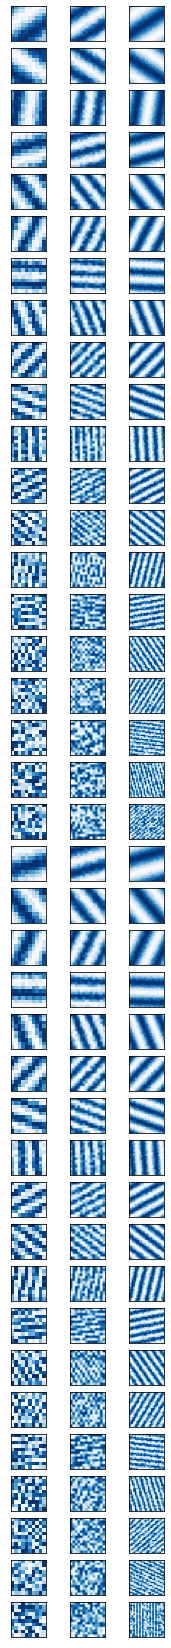

In [492]:
plt.figure(figsize=(3, 30))
for l, name in enumerate(["160", "224", "384"]):
    res = []
    emb_line = False
    with open("/checkpoint/antares/experiments/fl_new_master/augposemb/vit/visualize_emb_sin_cape_224_" + name, "r") as f:
        for line in f:
            if "emb" in line:
                emb_line = True
                continue
            if emb_line and "emb" not in line and "[" not in line and line != "\n":
                tmp = line.strip().split(" ")
                tmp = [k for k in tmp if k != ""]
                res.append(numpy.array(list(map(float, tmp))))

    cape_emb = res[len(res) // 2:]
    cape_emb = numpy.array(cape_emb)[:, 1:]
    k = l + 1
    img_size = int(numpy.sqrt(cape_emb.shape[1]))
    n = cape_emb.shape[0] // n_col + 1
    print(img_size, n)
    for i in range(cape_emb.shape[0])[::n_col]:
        plt.subplot(n, 3, k)
        plt.imshow(cape_emb[i, :].reshape(img_size, img_size), cmap="Blues", vmin=-1, vmax=1)
        plt.xticks([])
        plt.yticks([])
        k += 3
plt.savefig("vit_cape_emb_visualization.png", dpi=300, bbox_inches="tight")

10 39
14 39
24 39


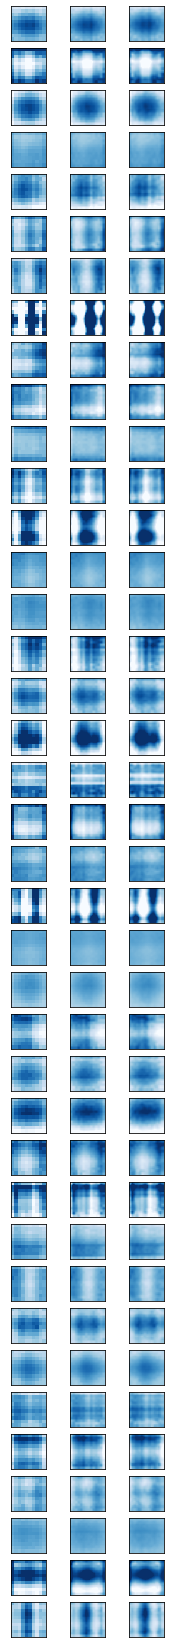

In [493]:
plt.figure(figsize=(3, 30))
for l, name in enumerate(["160", "224", "384"]):
    abspos_emb = []
    emb_line = False
    with open("/checkpoint/antares/experiments/fl_new_master/augposemb/vit/visualize_emb_abspos_224_" + name, "r") as f:
        for line in f:
            if "emb" in line:
                emb_line = True
                continue
            if emb_line and "emb" not in line and "[" not in line and line != "\n":
                tmp = line.strip().split(" ")
                tmp = [k for k in tmp if k != ""]
                abspos_emb.append(numpy.array(list(map(float, tmp))))

    abspos_emb = numpy.array(abspos_emb)[:, 1:]
    k = l + 1
    img_size = int(numpy.sqrt(abspos_emb.shape[1]))
    n = abspos_emb.shape[0] // n_col + 1
    print(img_size, n)
    for i in range(abspos_emb.shape[0])[::n_col]:
        plt.subplot(n, 3, k)
        plt.imshow(abspos_emb[i, :].reshape(img_size, img_size), cmap="Blues", vmin=-1, vmax=1)
        plt.xticks([])
        plt.yticks([])
        k += 3
plt.savefig("vit_abspos_emb_visualization.png", dpi=300, bbox_inches="tight")